<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/C)_EXPLORATORIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#importamos las librerías necesarias

import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [43]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Carga de BD desde drive

r_2015 ='/content/drive/MyDrive/analitica3/base_datos/r_2015_p.csv'
r_2016 ='/content/drive/MyDrive/analitica3/base_datos/r_2016_p.csv'

r_2015 = pd.read_csv(r_2015)
r_2016 = pd.read_csv(r_2016)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [45]:
r_2015.head()

,Unnamed: 0,employeeid,environmentsatisfaction,jobsatisfaction,worklifebalance,datesurvey,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,infodate,jobinvolvement,performancerating,surveydate,attrition,retirementdate,retirementtype,resignationreason
0,0,1,3.0,4.0,2.0,2015-12-31,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,2015-12-31,3,3,2015-12-31,No,no aplica,no aplica,no aplica
1,1,2,3.0,2.0,4.0,2015-12-31,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2015-12-31,2,4,2015-12-31,No,no aplica,no aplica,no aplica
2,2,3,2.0,2.0,1.0,2015-12-31,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2015-12-31,3,3,2015-12-31,No,no aplica,no aplica,no aplica
3,3,4,4.0,4.0,3.0,2015-12-31,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2015-12-31,2,3,2015-12-31,No,no aplica,no aplica,no aplica
4,4,5,4.0,1.0,3.0,2015-12-31,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,2015-12-31,3,3,2015-12-31,No,no aplica,no aplica,no aplica


In [46]:
r_2015 = r_2015.drop(['Unnamed: 0'], axis=1)
r_2016 = r_2016.drop(['Unnamed: 0'], axis=1)

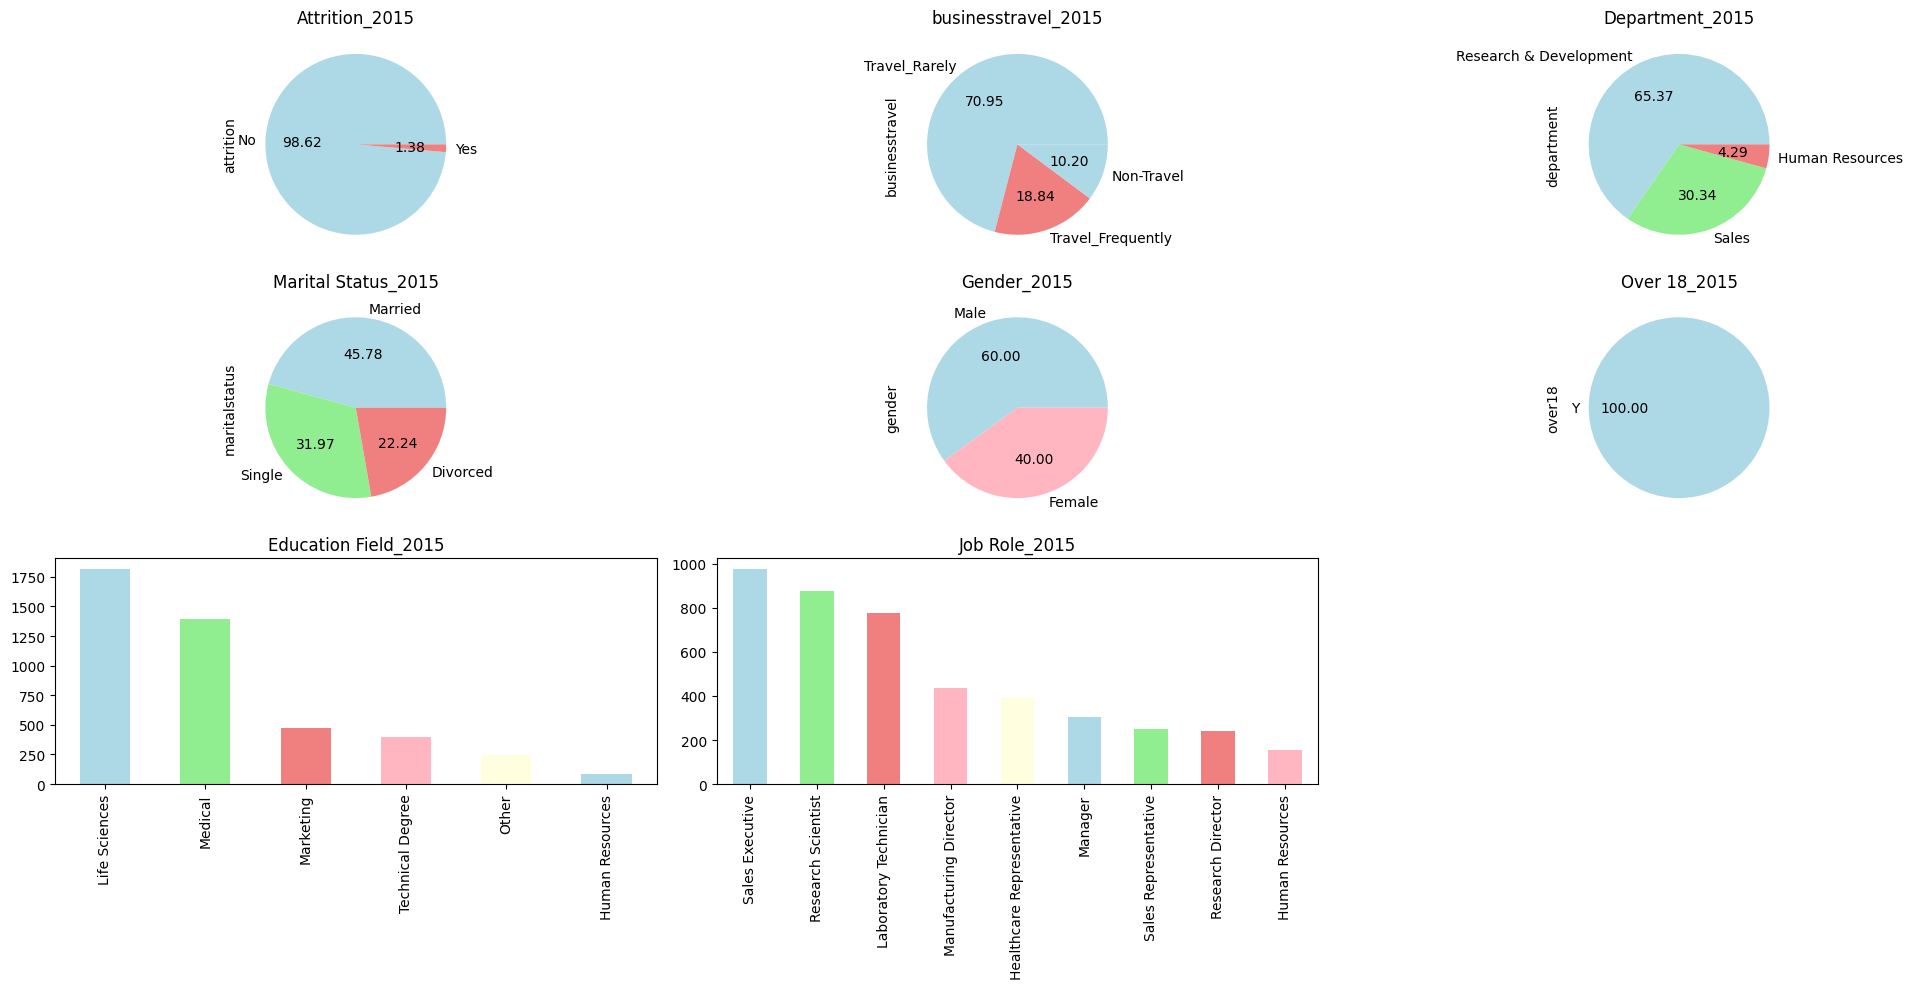

In [47]:
plt.figure(figsize=(20, 10))

# Gráfico de pastel para 'attrition_2015'
plt.subplot(331)
r_2015['attrition'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightcoral'])
plt.title('Attrition_2015')

# Gráfico de pastel para 'businesstravel_2015'
plt.subplot(332)
r_2015['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightcoral'])
plt.title('businesstravel_2015')

# Gráfico de pastel para 'department_2015'
plt.subplot(333)
r_2015['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Department_2015')

# Gráfico de barras para 'educationfield_2015'
plt.subplot(337)
r_2015['educationfield'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Education Field_2015')

# Gráfico de pastel para 'gender_2015'
plt.subplot(335)
r_2015['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Gender_2015')

# Gráfico de barras para 'jobrole_2015'
plt.subplot(338)
r_2015['jobrole'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Job Role_2015')

# Gráfico de pastel para 'maritalstatus_2015'
plt.subplot(334)
r_2015['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Marital Status_2015')

# Gráfico de pastel para 'over18_2015'
plt.subplot(336)
r_2015['over18'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Over 18_2015')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

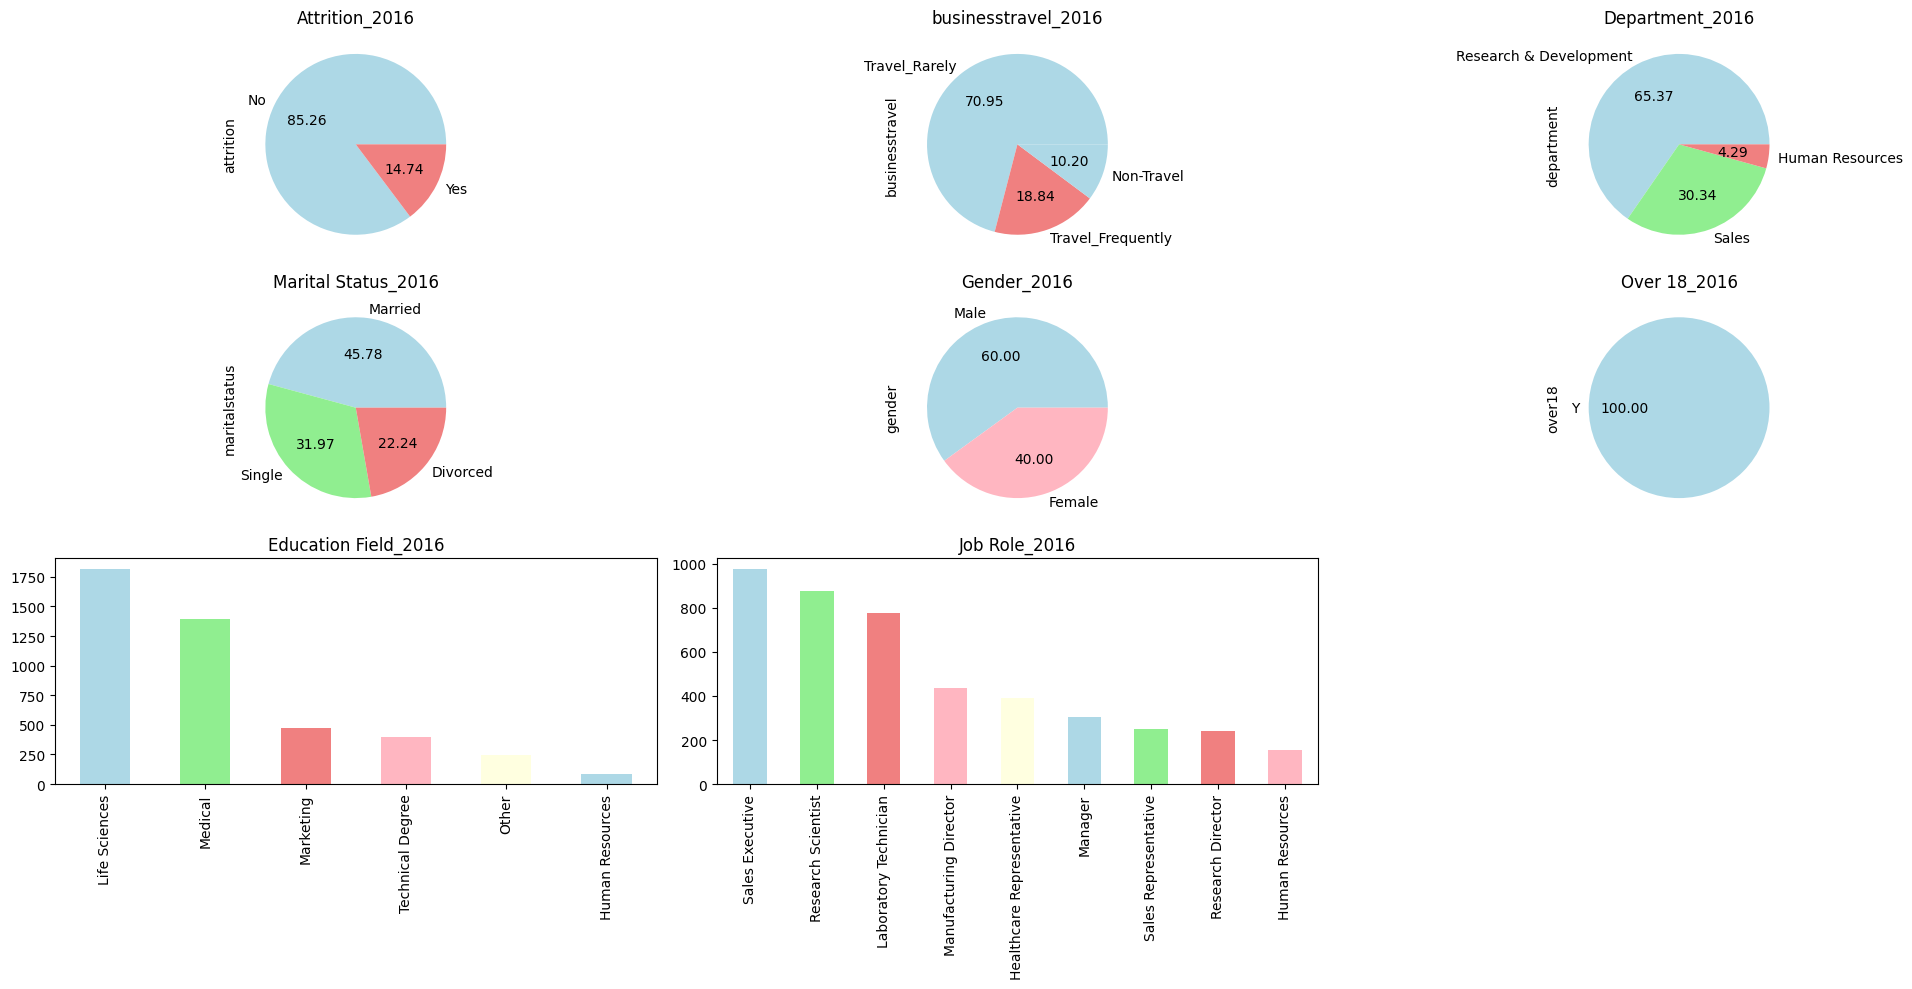

In [48]:
plt.figure(figsize=(20, 10))

# Gráfico de pastel para 'attrition_2016'
plt.subplot(331)
r_2016['attrition'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightcoral'])
plt.title('Attrition_2016')

# Gráfico de pastel para 'businesstravel_2016'
plt.subplot(332)
r_2016['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightcoral'])
plt.title('businesstravel_2016')

# Gráfico de pastel para 'department_2016'
plt.subplot(333)
r_2016['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Department_2016')

# Gráfico de barras para 'educationfield_2015'
plt.subplot(337)
r_2016['educationfield'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Education Field_2016')

# Gráfico de pastel para 'gender_2016'
plt.subplot(335)
r_2016['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Gender_2016')

# Gráfico de barras para 'jobrole_2016'
plt.subplot(338)
r_2016['jobrole'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Job Role_2016')

# Gráfico de pastel para 'maritalstatus_2016'
plt.subplot(334)
r_2016['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Marital Status_2016')

# Gráfico de pastel para 'over18_2016'
plt.subplot(336)
r_2016['over18'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'])
plt.title('Over 18_2016')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

**Se encuentra que la variable over 18 presenta el mismo valor en todas sus filas ya que significa que todos los trabajadores son mayores de 18 años por lo que se decide eliminarla debido a su irrelevancia dentro del caso de estudio.**

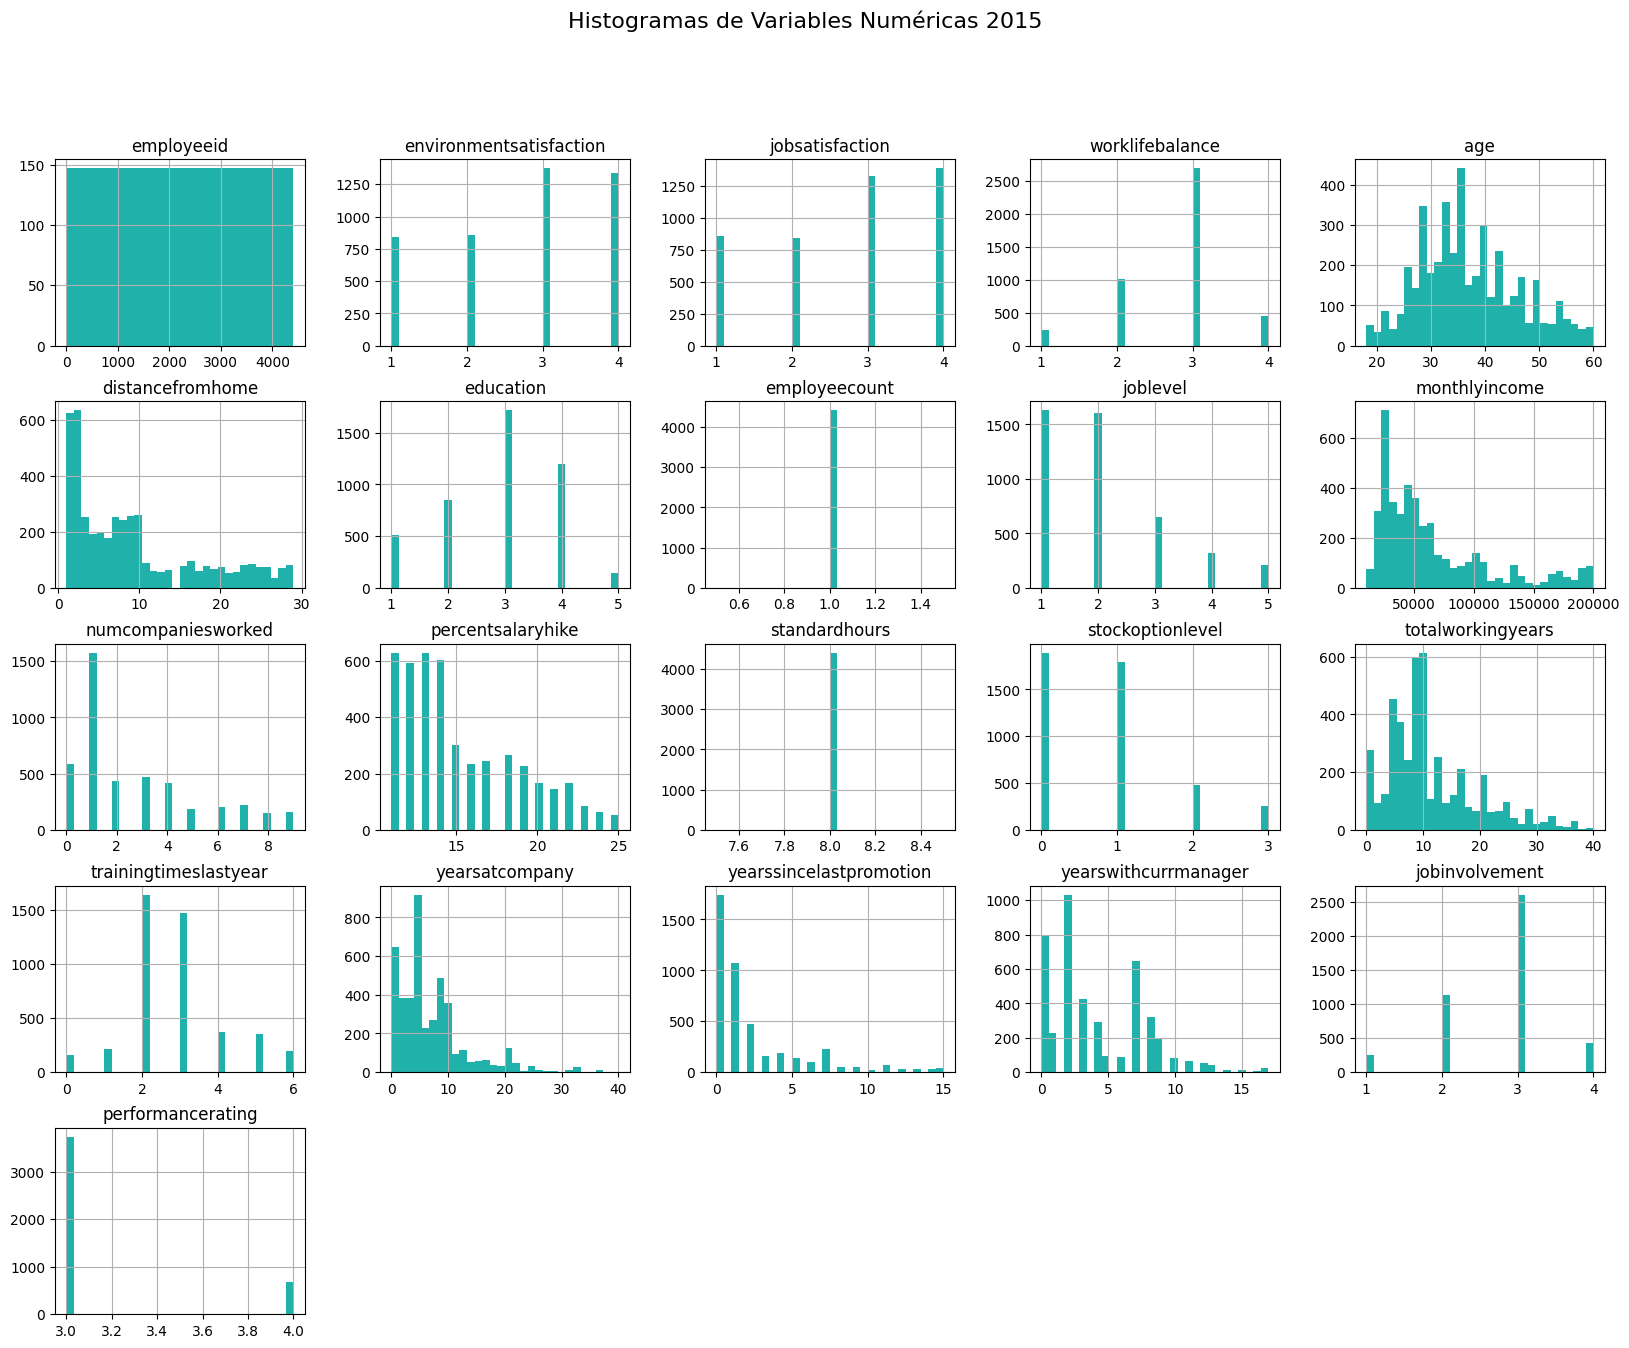

In [49]:
r_2015.hist(bins=30, figsize=(20, 15), color='LightSeaGreen')

# Agregar títulos y etiquetas de ejes si es necesario
plt.suptitle("Histogramas de Variables Numéricas 2015", fontsize=16)
plt.show()

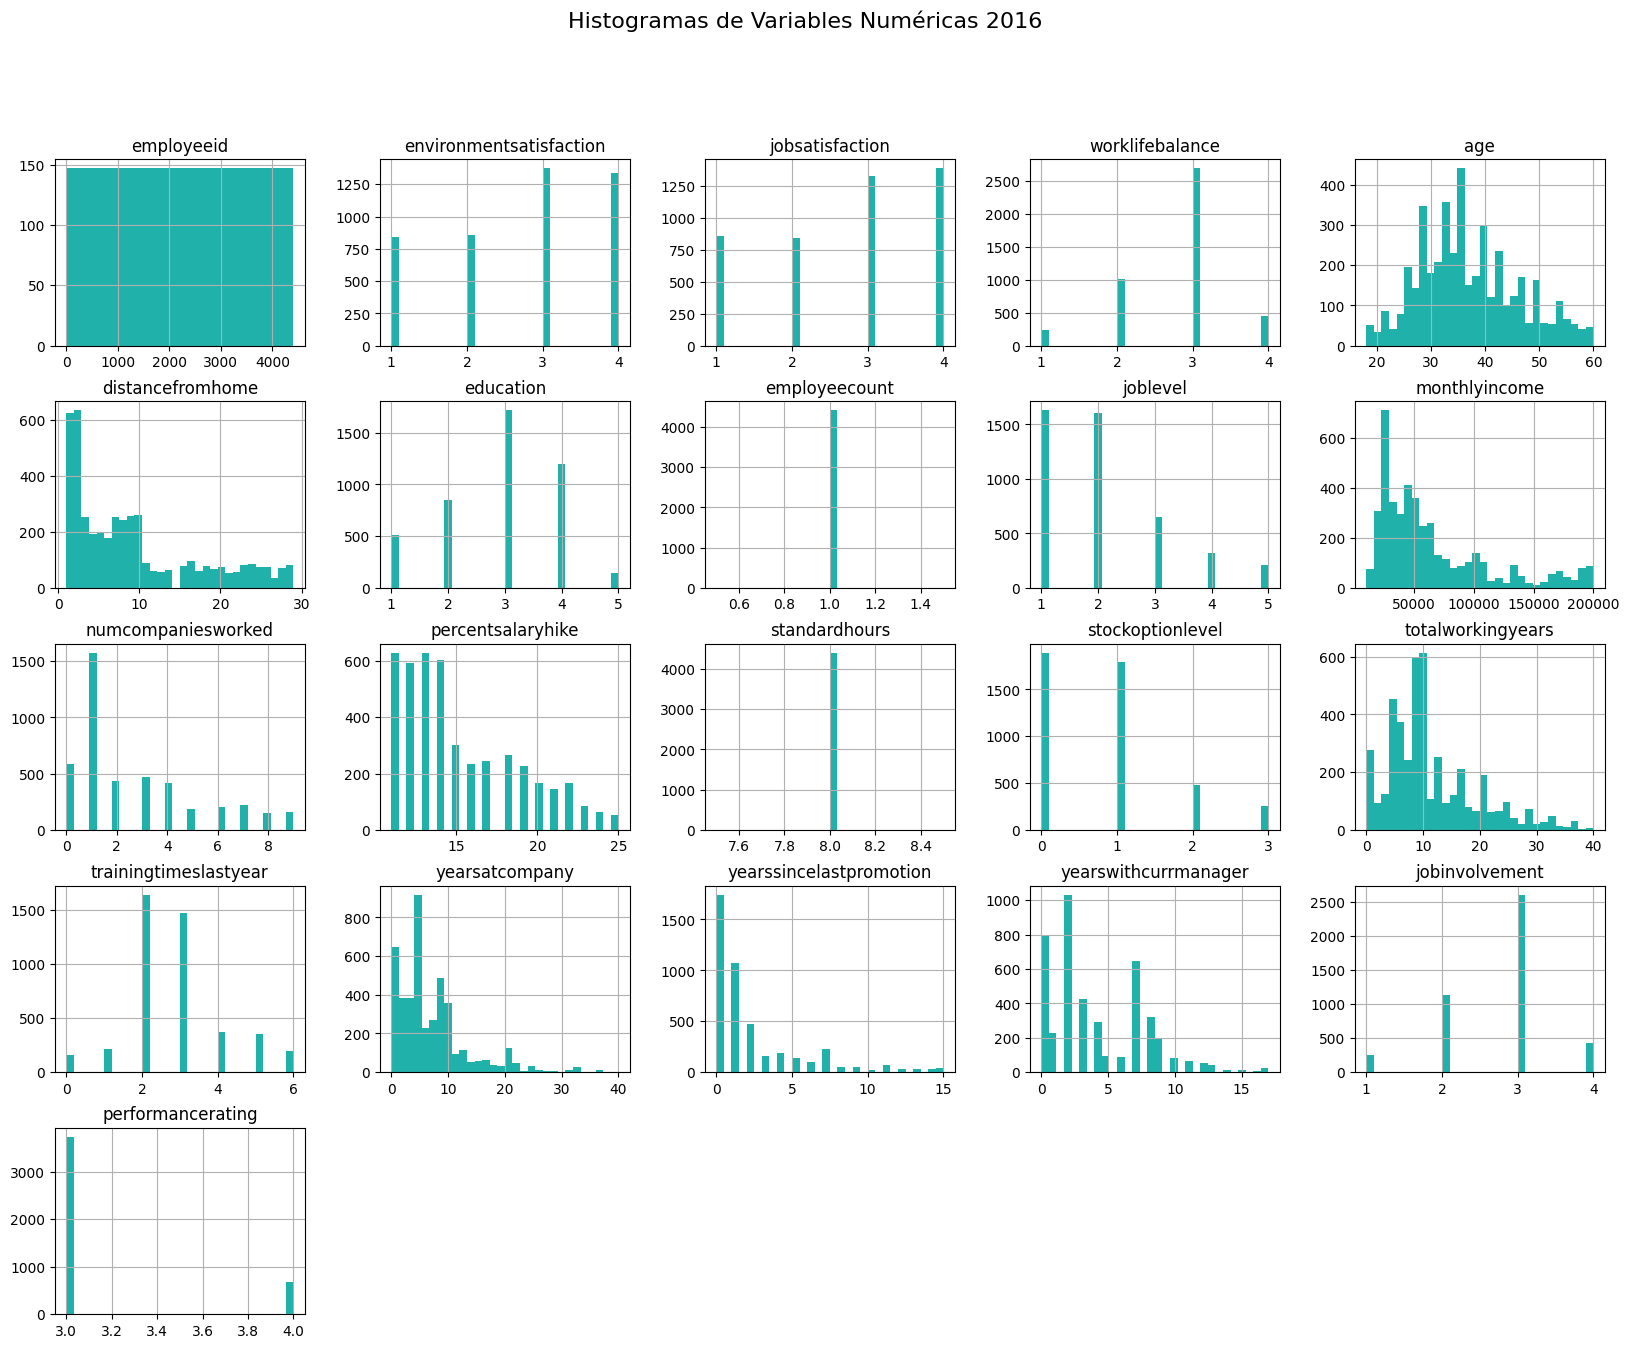

In [50]:
r_2016.hist(bins=30, figsize=(20, 15), color='LightSeaGreen')

# Agregar títulos y etiquetas de ejes si es necesario
plt.suptitle("Histogramas de Variables Numéricas 2016", fontsize=16)
plt.show()

**Luego de graficar se puede observar que las variables employeecount y standarhours toman un solo valor en todas sus filas por lo que se decide eliminarlas.
La variable employeeid también se elimina debido a que es un número que identifica a cada empleado, y ya cumplió su función que era mostrar la cantidad de empleados diferentes y ayudar a la agrupación de las BD**

In [51]:
#Se eliminan las columnas que no aportan al caso de estudio

r_2015 = r_2015.drop(['over18', 'employeecount', 'employeeid', 'standardhours'], axis=1)
r_2016 = r_2016.drop(['over18', 'employeecount', 'employeeid', 'standardhours'], axis=1)
r_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   environmentsatisfaction  4410 non-null   float64
 1   jobsatisfaction          4410 non-null   float64
 2   worklifebalance          4410 non-null   float64
 3   datesurvey               4410 non-null   object 
 4   age                      4410 non-null   int64  
 5   businesstravel           4410 non-null   object 
 6   department               4410 non-null   object 
 7   distancefromhome         4410 non-null   int64  
 8   education                4410 non-null   int64  
 9   educationfield           4410 non-null   object 
 10  gender                   4410 non-null   object 
 11  joblevel                 4410 non-null   int64  
 12  jobrole                  4410 non-null   object 
 13  maritalstatus            4410 non-null   object 
 14  monthlyincome           

<ipython-input-52-403a6a56456c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x="attrition", data=r_2015, palette='Set2')


Text(0.5, 1.0, 'Gráfico de Torta - Attrition 2015')

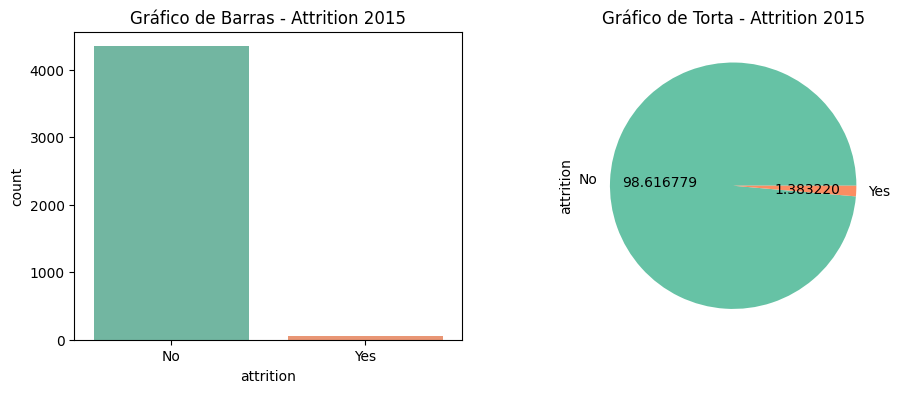

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# Gráfico de Barras con paleta "Set2"
sns.countplot(ax=axes[0], x="attrition", data=r_2015, palette='Set2')
axes[0].set_title("Gráfico de Barras - Attrition 2015")

# Gráfico de Torta con paleta "Set2"
r_2015["attrition"].value_counts().plot.pie(autopct='%2f', ax=axes[1], wedgeprops={'linewidth': 8}, colors=sns.color_palette('Set2'))
axes[1].set_title("Gráfico de Torta - Attrition 2015")

<ipython-input-53-ea6210c4e16b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x="attrition", data=r_2016, palette='Set2')


Text(0.5, 1.0, 'Gráfico de Torta - Attrition 2016')

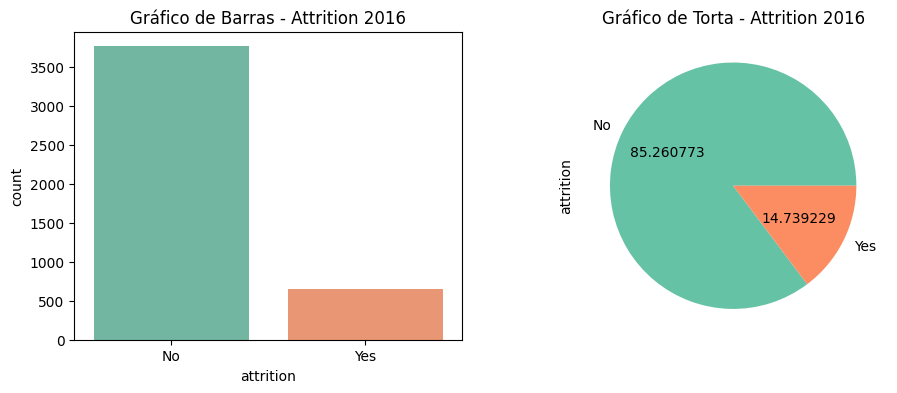

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# Gráfico de Barras con paleta "Set2"
sns.countplot(ax=axes[0], x="attrition", data=r_2016, palette='Set2')
axes[0].set_title("Gráfico de Barras - Attrition 2016")

# Gráfico de Torta con paleta "Set2"
r_2016["attrition"].value_counts().plot.pie(autopct='%2f', ax=axes[1], wedgeprops={'linewidth': 8}, colors=sns.color_palette('Set2'))
axes[1].set_title("Gráfico de Torta - Attrition 2016")

**Comparación variables categóricas y variable objetivo**

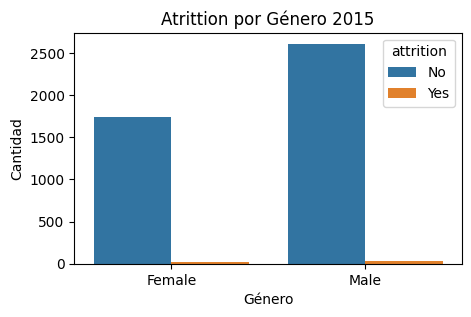

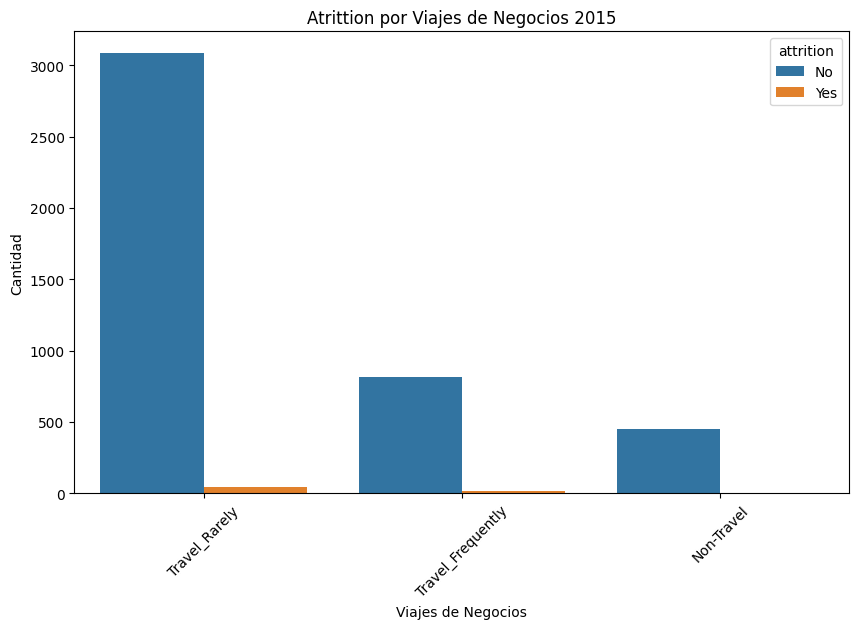

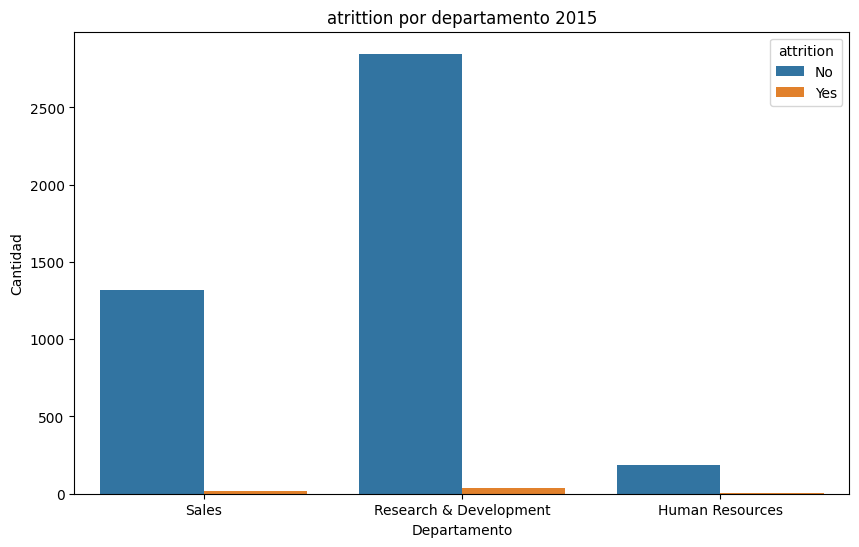

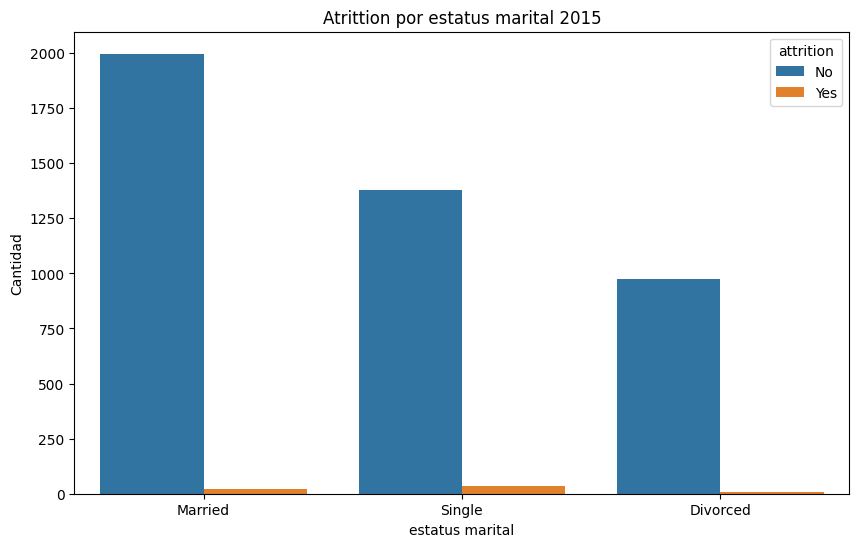

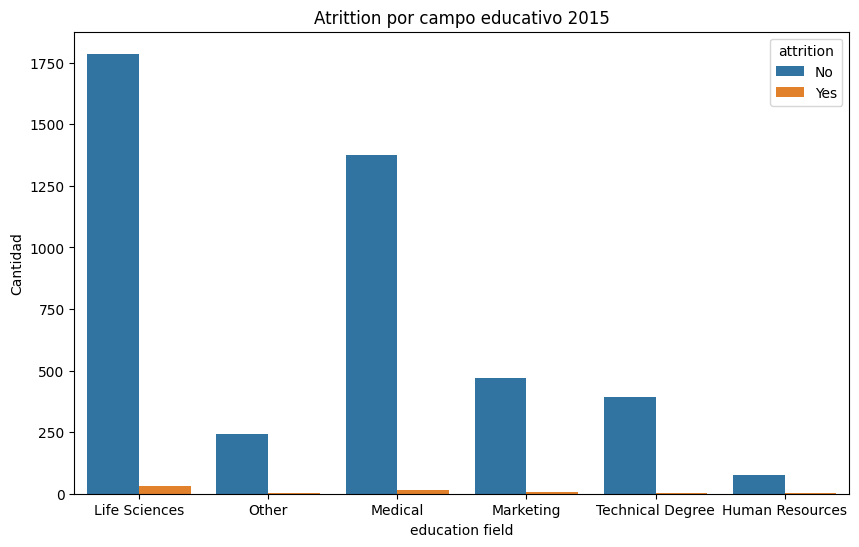

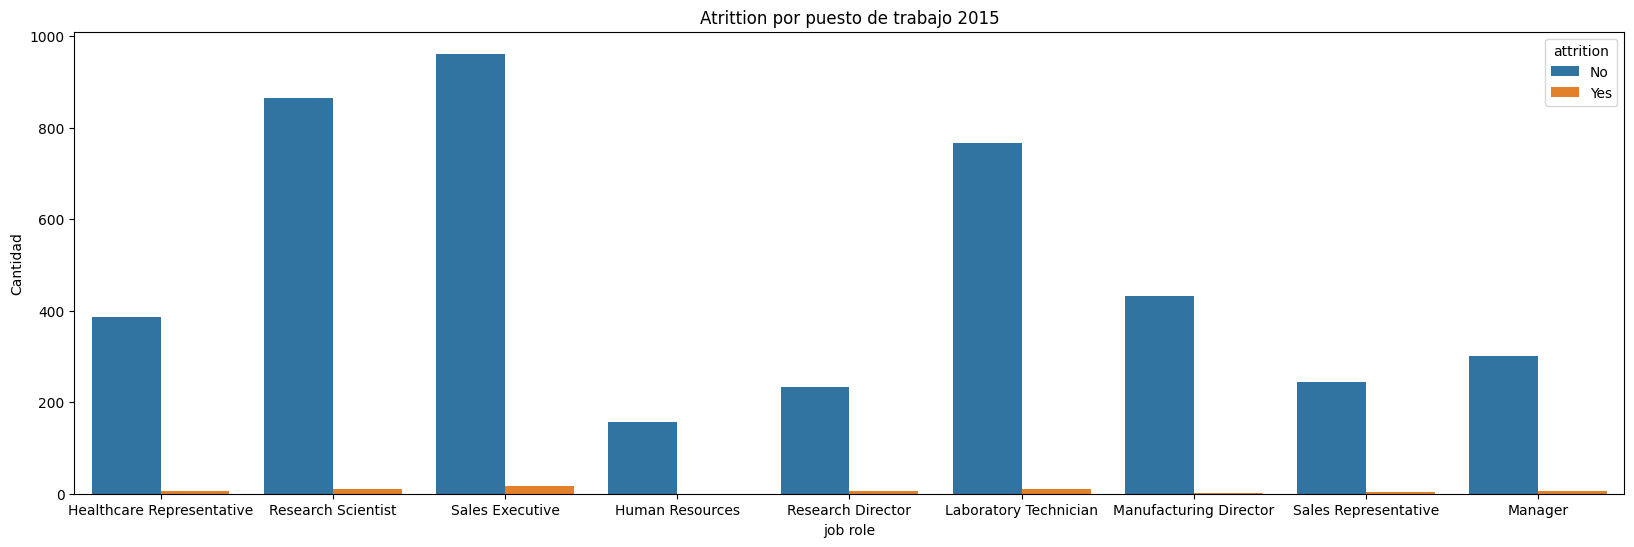

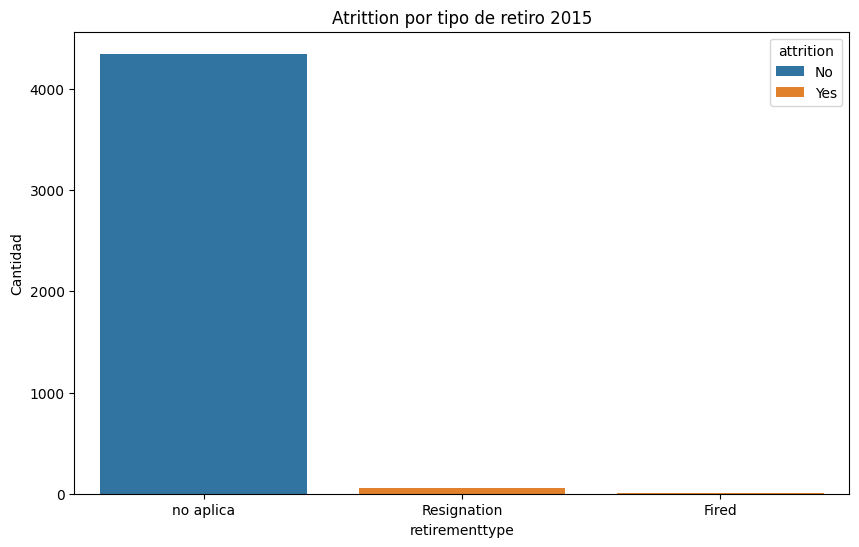

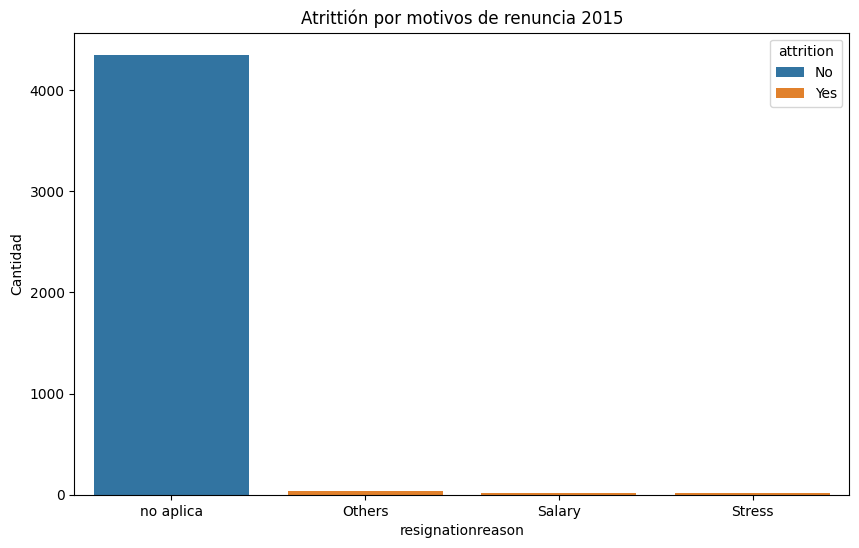

In [54]:
# Gráfico de barras para comparar gender y attrition 2015
plt.figure(figsize=(5, 3))
sns.countplot(data=r_2015, x='gender', hue='attrition')
plt.title('Atrittion por Género 2015')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar bussinestravel y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='businesstravel', hue='attrition')
plt.title('Atrittion por Viajes de Negocios 2015')
plt.xlabel('Viajes de Negocios')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar department y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='department', hue='attrition')
plt.title('atrittion por departamento 2015')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()


# Gráfico de barras para comparar maritalstatus y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='maritalstatus', hue='attrition')
plt.title('Atrittion por estatus marital 2015')
plt.xlabel('estatus marital')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar educationfield y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='educationfield', hue='attrition')
plt.title('Atrittion por campo educativo 2015')
plt.xlabel('education field')
plt.ylabel('Cantidad')
plt.show()


# Gráfico de barras para comparar jobrole y attrition 2015
plt.figure(figsize=(20, 6))
sns.countplot(data=r_2015, x='jobrole', hue='attrition')
plt.title('Atrittion por puesto de trabajo 2015')
plt.xlabel('job role')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar retirementtype y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='retirementtype', hue='attrition')
plt.title('Atrittion por tipo de retiro 2015')
plt.xlabel('retirementtype')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar resignationreason y attrition 2015
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2015, x='resignationreason', hue='attrition')
plt.title('Atrittión por motivos de renuncia 2015')
plt.xlabel('resignationreason')
plt.ylabel('Cantidad')
plt.show()

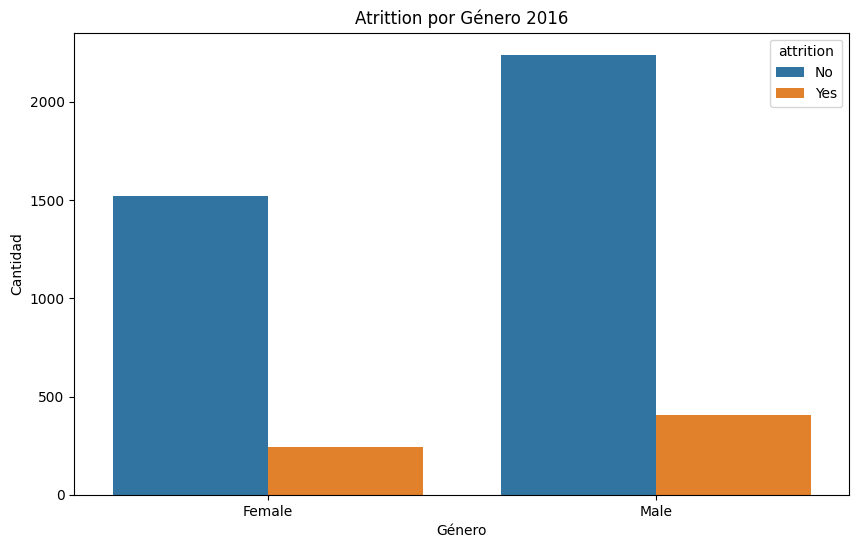

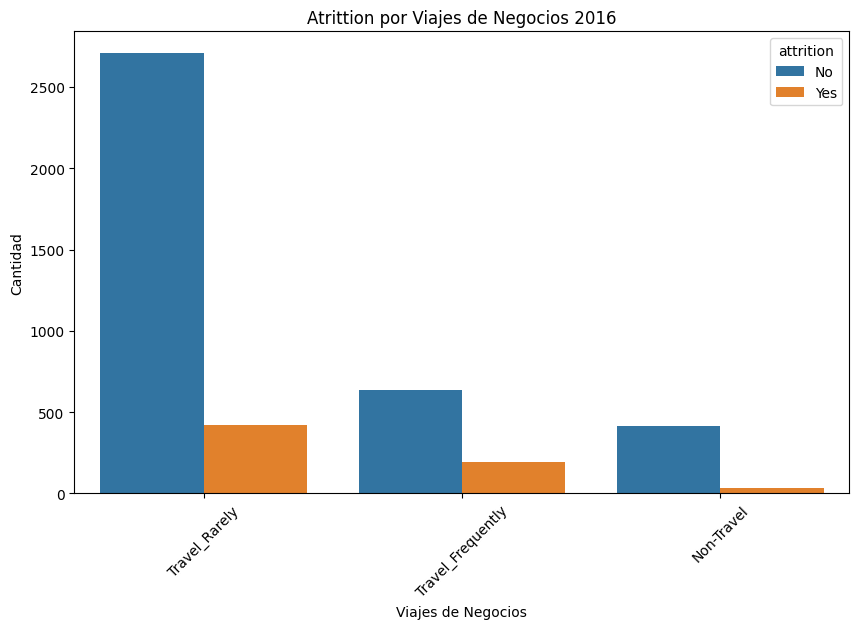

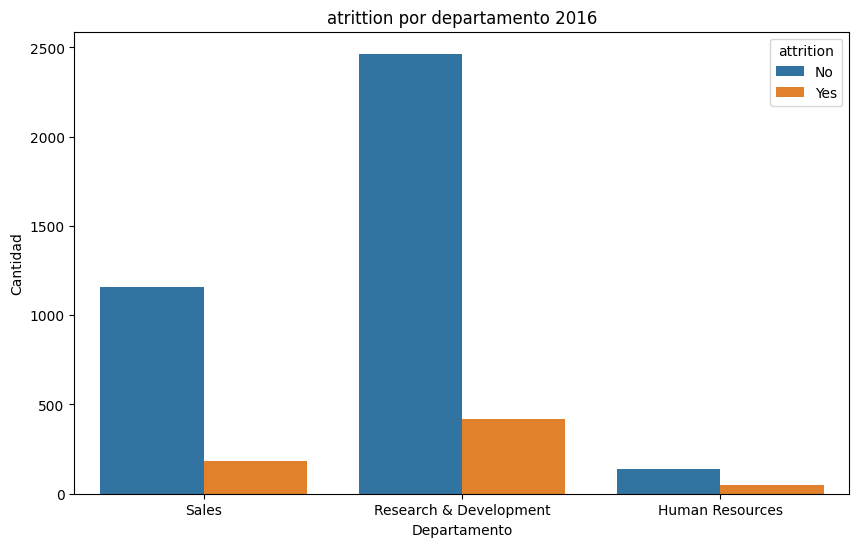

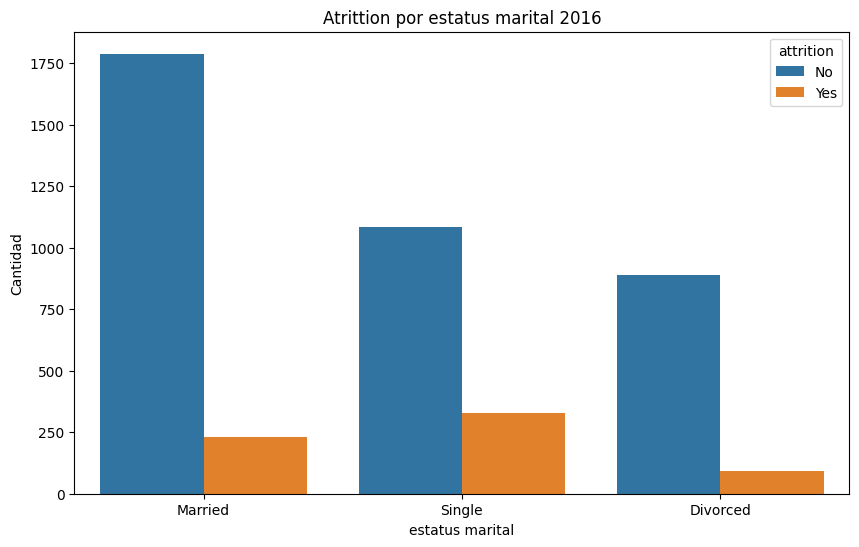

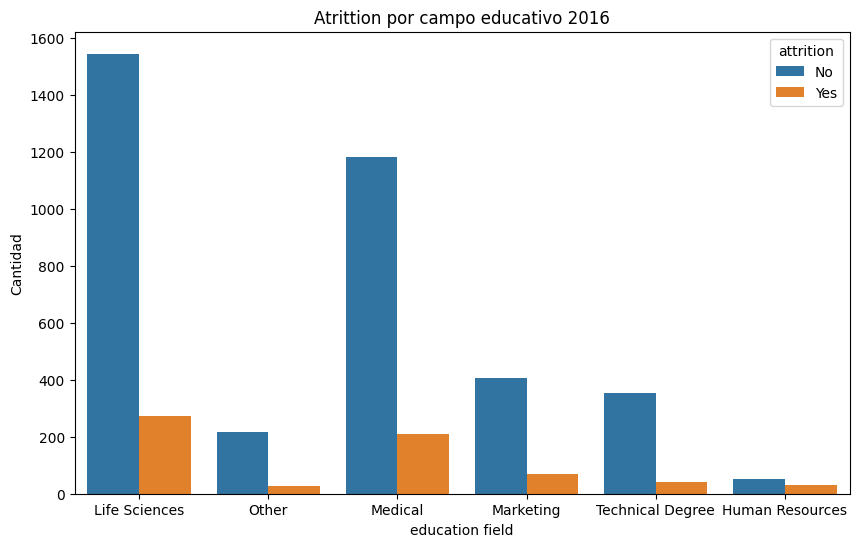

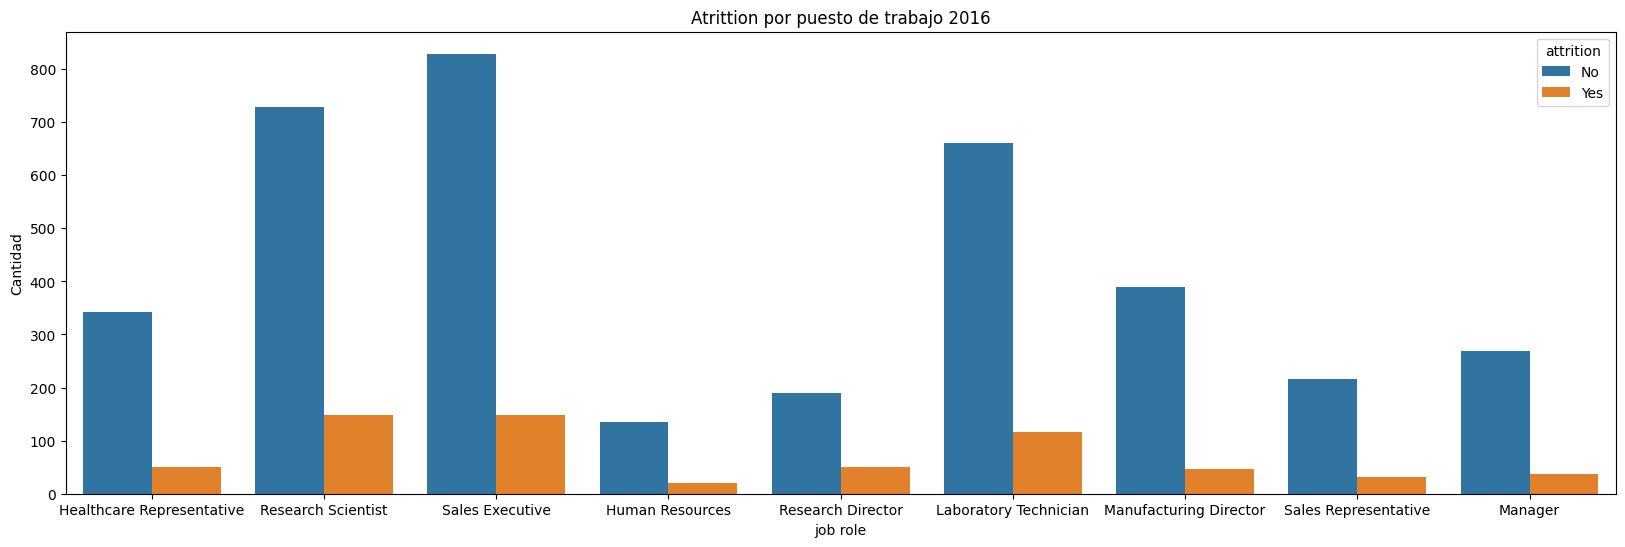

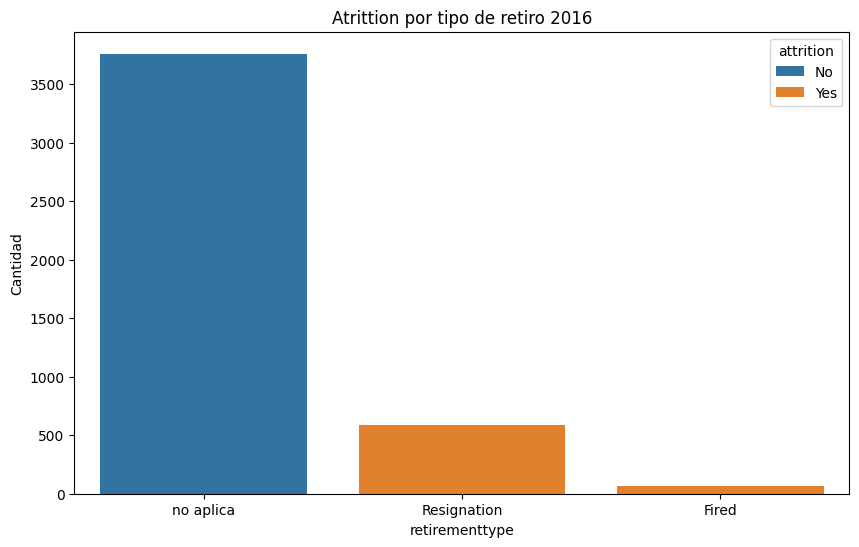

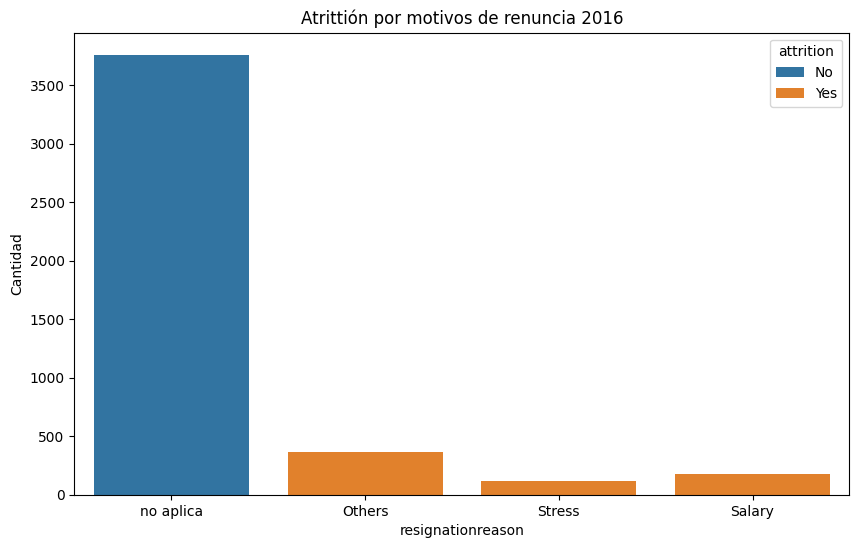

In [55]:
# Gráfico de barras para comparar gender y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='gender', hue='attrition')
plt.title('Atrittion por Género 2016')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar bussinestravel y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='businesstravel', hue='attrition')
plt.title('Atrittion por Viajes de Negocios 2016')
plt.xlabel('Viajes de Negocios')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar department y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='department', hue='attrition')
plt.title('atrittion por departamento 2016')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()


# Gráfico de barras para comparar maritalstatus y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='maritalstatus', hue='attrition')
plt.title('Atrittion por estatus marital 2016')
plt.xlabel('estatus marital')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar educationfield y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='educationfield', hue='attrition')
plt.title('Atrittion por campo educativo 2016')
plt.xlabel('education field')
plt.ylabel('Cantidad')
plt.show()


# Gráfico de barras para comparar jobrole y attrition 2016
plt.figure(figsize=(20, 6))
sns.countplot(data=r_2016, x='jobrole', hue='attrition')
plt.title('Atrittion por puesto de trabajo 2016')
plt.xlabel('job role')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar retirementtype y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='retirementtype', hue='attrition')
plt.title('Atrittion por tipo de retiro 2016')
plt.xlabel('retirementtype')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para comparar resignationreason y attrition 2016
plt.figure(figsize=(10, 6))
sns.countplot(data=r_2016, x='resignationreason', hue='attrition')
plt.title('Atrittión por motivos de renuncia 2016')
plt.xlabel('resignationreason')
plt.ylabel('Cantidad')
plt.show()

**Comparación de variables númericas y variable objetivo**

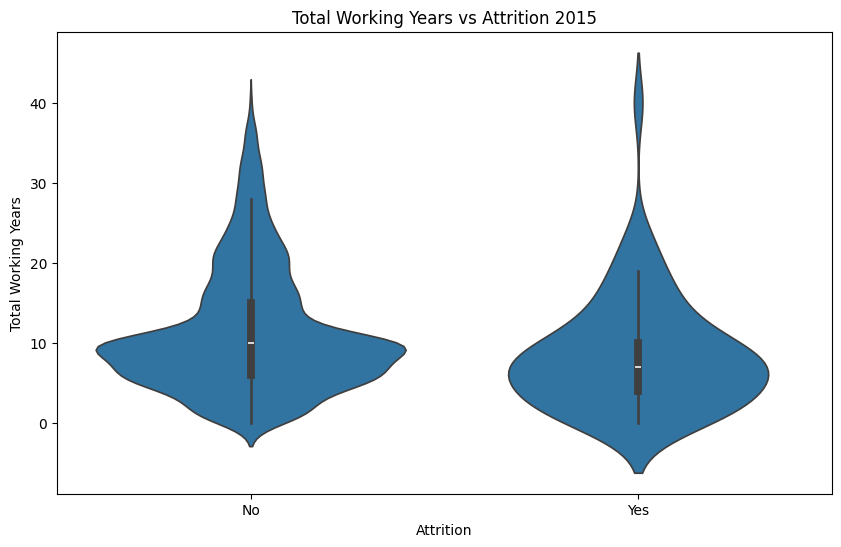

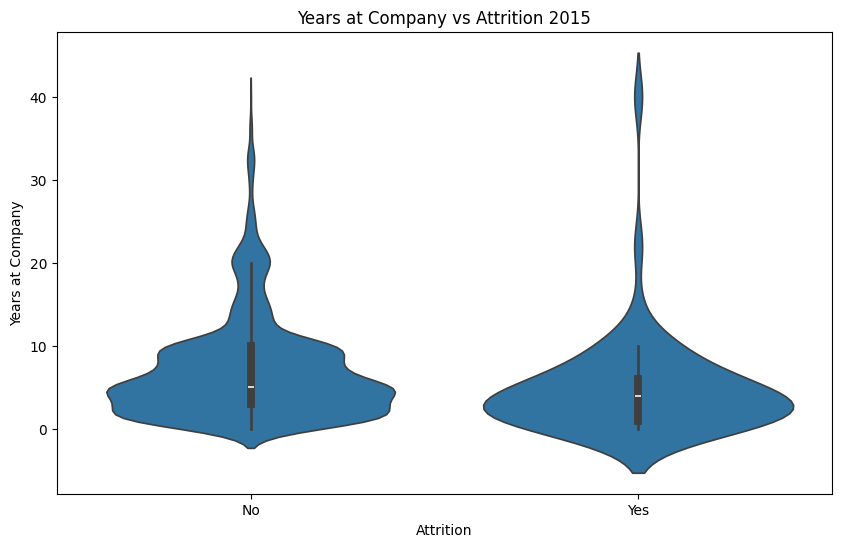

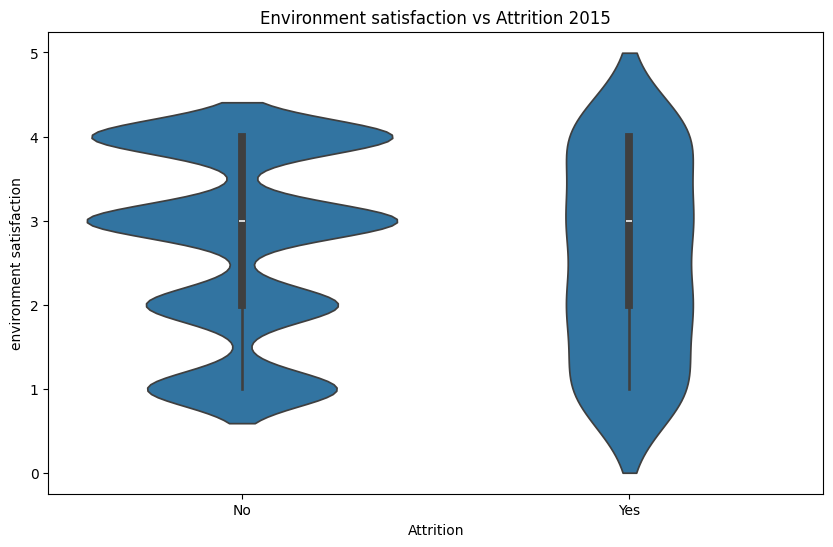

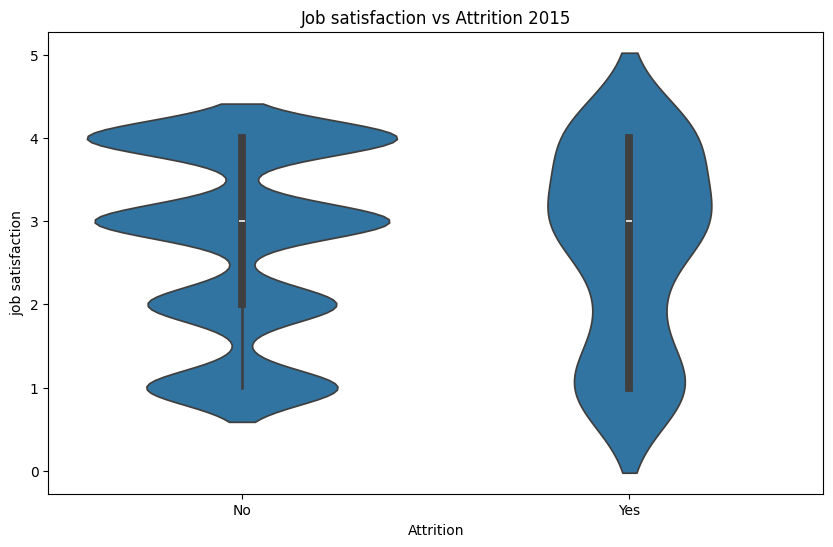

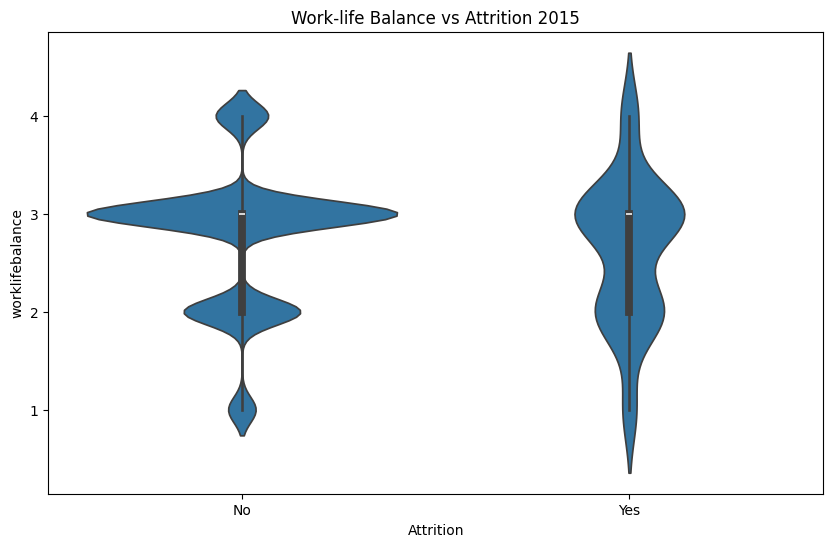

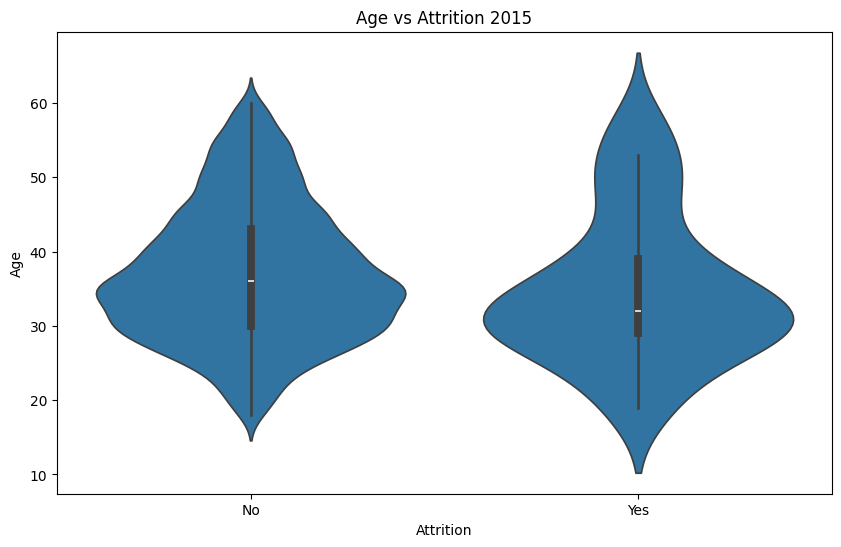

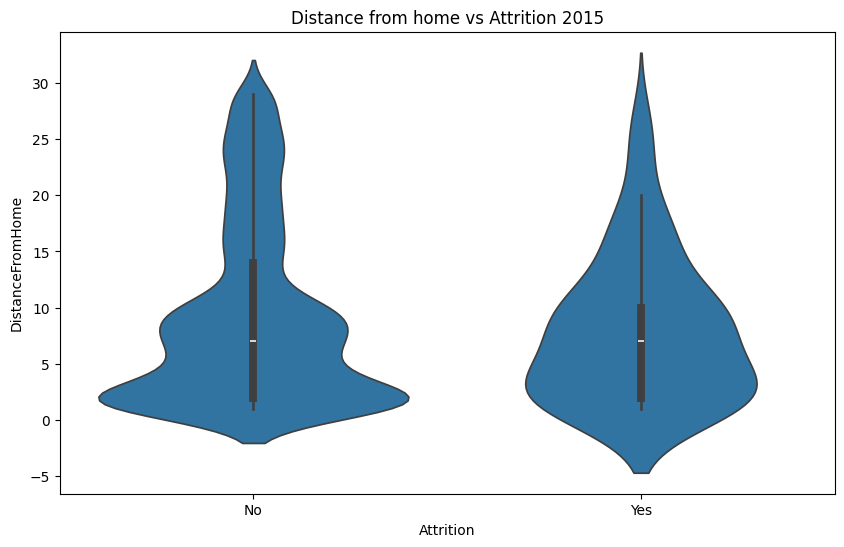

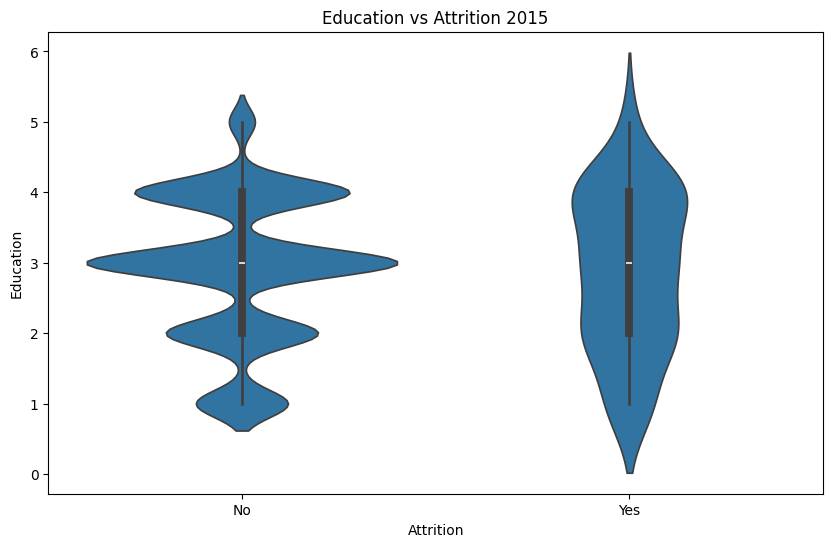

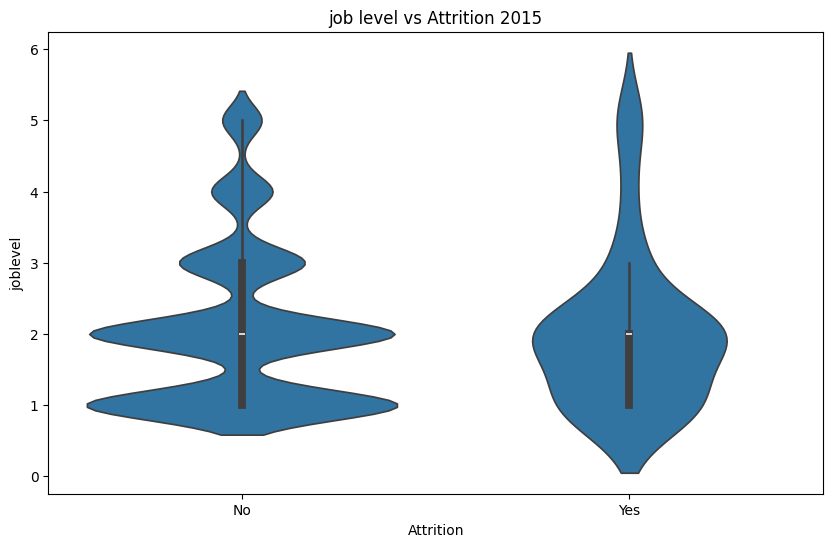

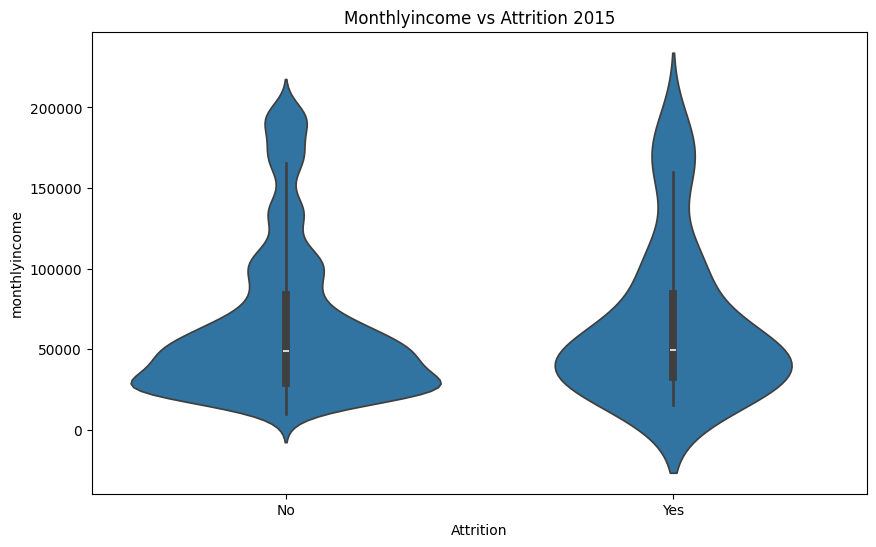

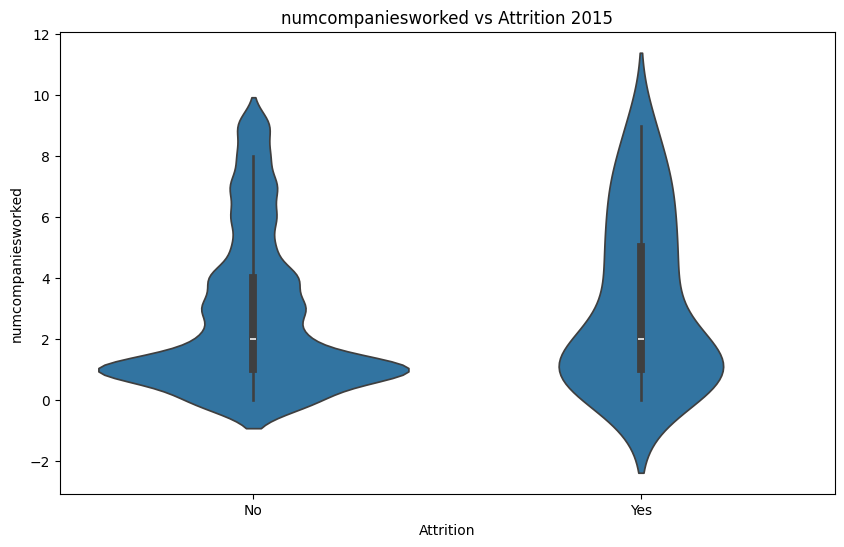

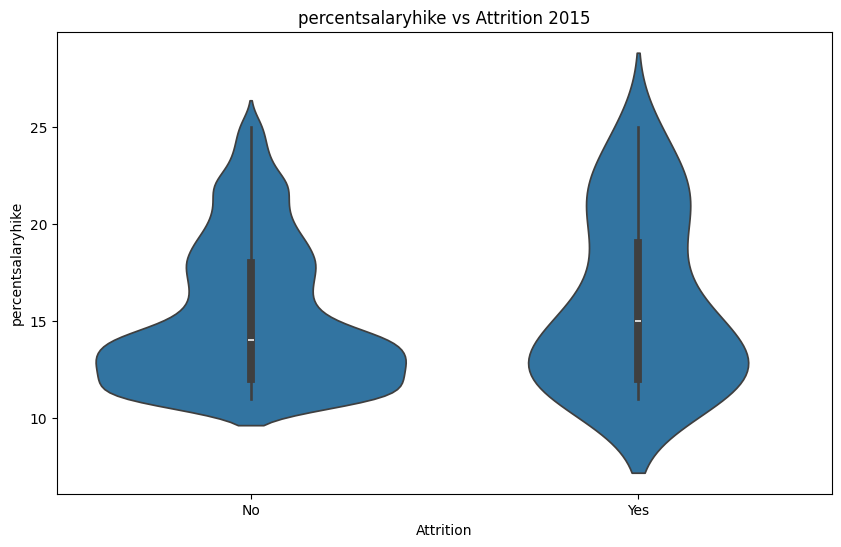

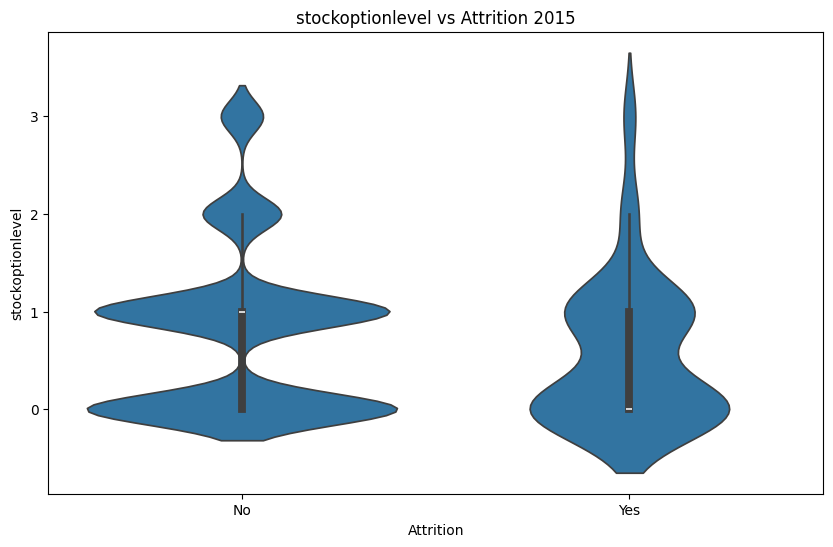

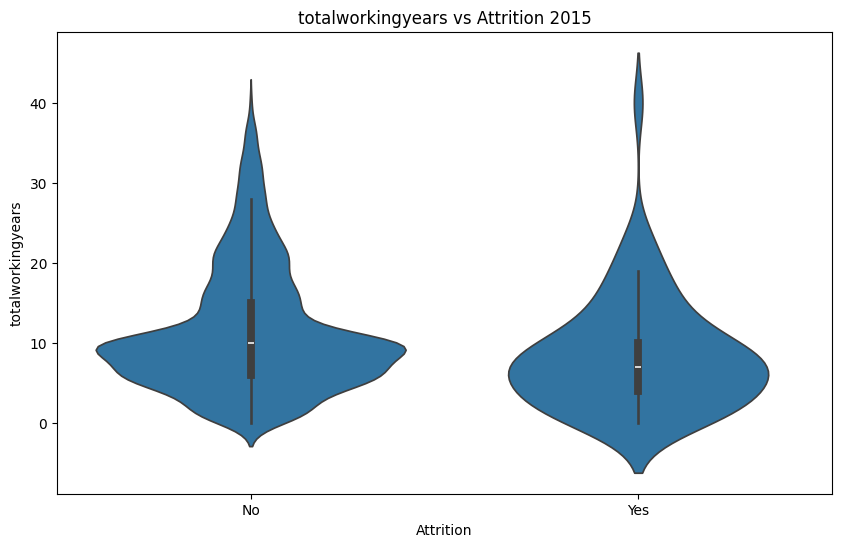

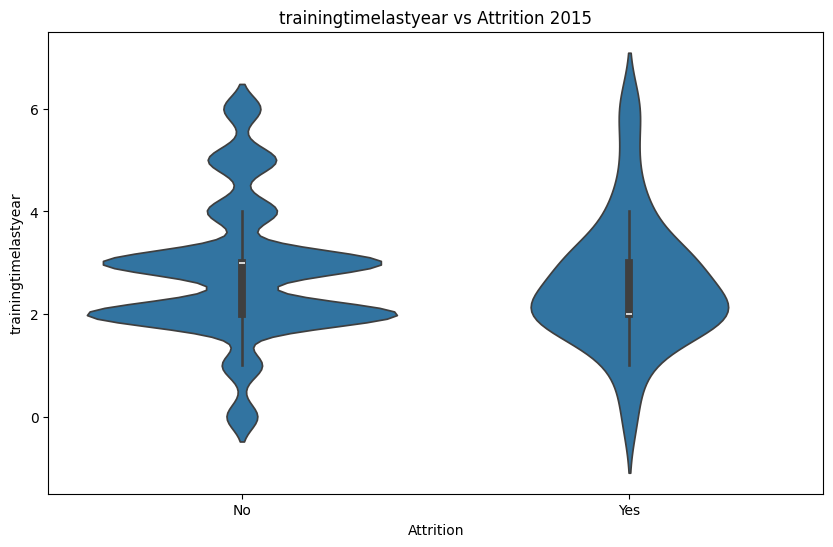

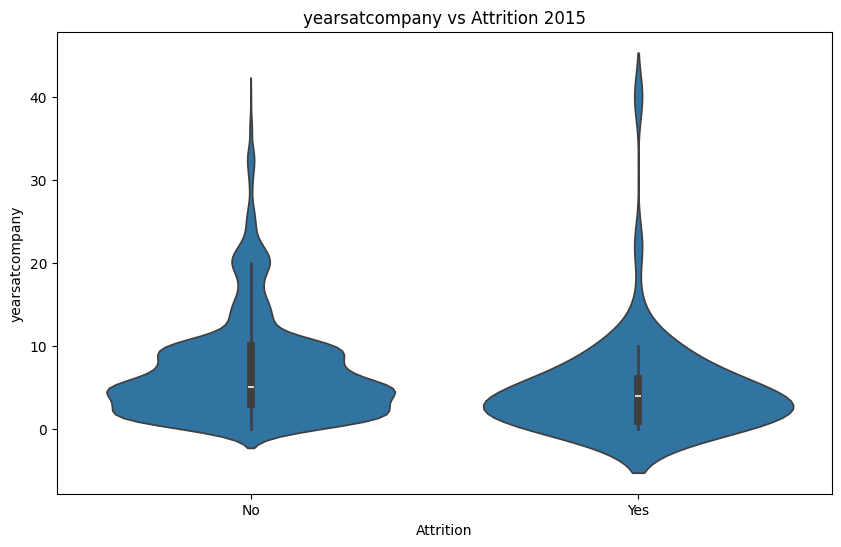

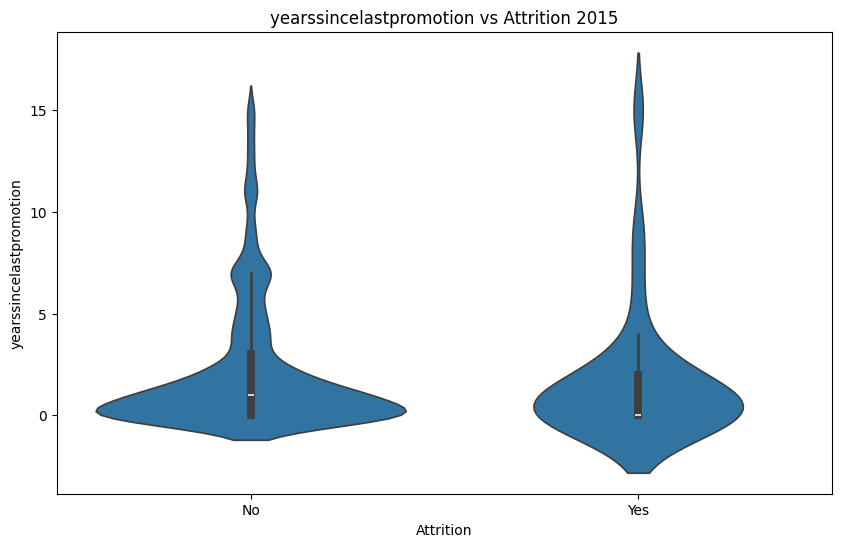

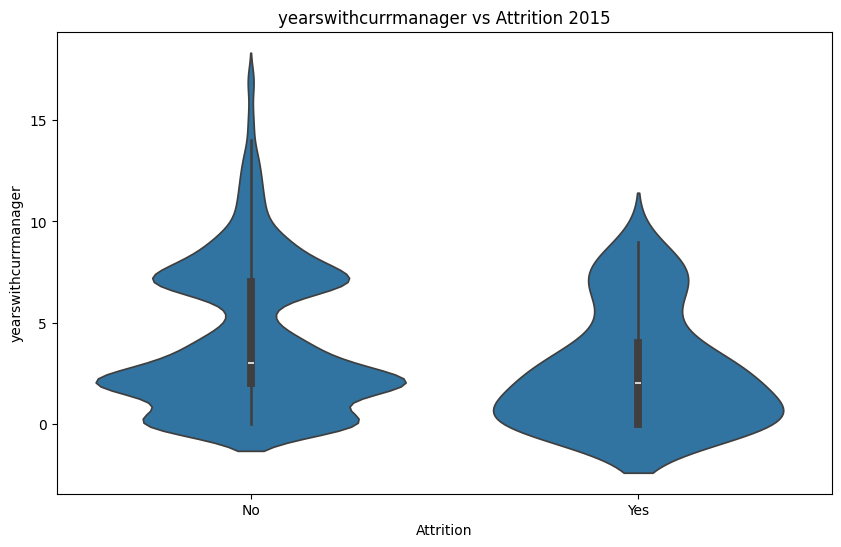

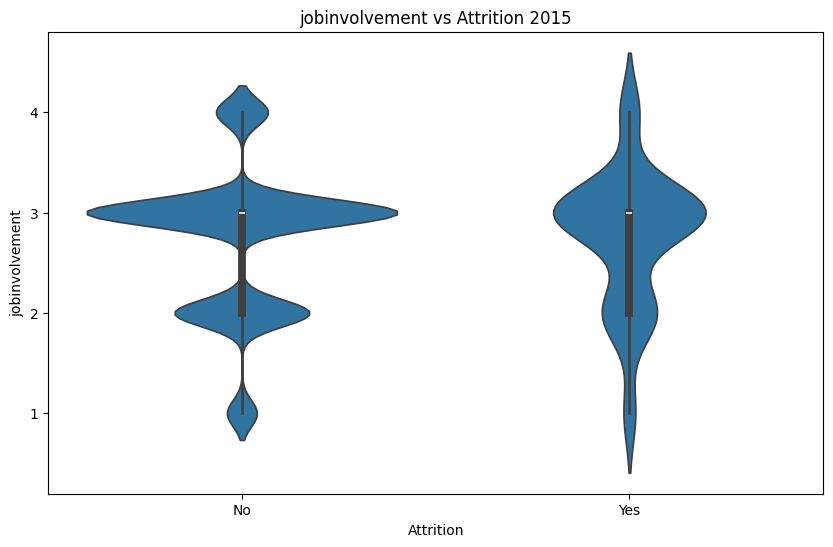

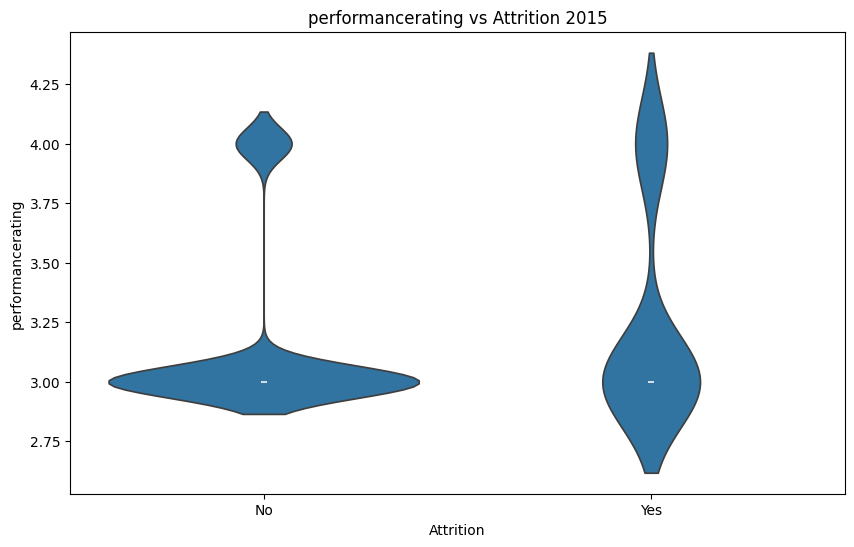

In [56]:
# Gráfico de diagrama de violín para 'totalworkingyears' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='totalworkingyears')
plt.title('Total Working Years vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

# Gráfico de diagrama de violín para 'yearsatcompany' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='yearsatcompany')
plt.title('Years at Company vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

# Gráfico de diagrama de violín para 'environmentsatisfaction' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='environmentsatisfaction')
plt.title('Environment satisfaction vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('environment satisfaction')
plt.show()

# Gráfico de diagrama de violín para 'jobsatisfaction' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='jobsatisfaction')
plt.title('Job satisfaction vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('job satisfaction')
plt.show()

# Gráfico de diagrama de violín para 'worklifebalance' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='worklifebalance')
plt.title('Work-life Balance vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('worklifebalance')
plt.show()

# Gráfico de diagrama de violín para 'age' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='age')
plt.title('Age vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# Gráfico de diagrama de violín para 'distancefromhome' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='distancefromhome')
plt.title('Distance from home vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

# Gráfico de diagrama de violín para 'education' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='education')
plt.title('Education vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.show()

# Gráfico de diagrama de violín para 'Joblevel' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='joblevel')
plt.title('job level vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('joblevel')
plt.show()

# Gráfico de diagrama de violín para 'monthlyincome' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='monthlyincome')
plt.title('Monthlyincome vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('monthlyincome')
plt.show()

# Gráfico de diagrama de violín para 'numcompaniesworked' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='numcompaniesworked')
plt.title('numcompaniesworked vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('numcompaniesworked')
plt.show()

# Gráfico de diagrama de violín para 'percentsalaryhike' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='percentsalaryhike')
plt.title('percentsalaryhike vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('percentsalaryhike')
plt.show()

# Gráfico de diagrama de violín para 'stockoptionlevel' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='stockoptionlevel')
plt.title('stockoptionlevel vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('stockoptionlevel')
plt.show()

# Gráfico de diagrama de violín para 'totalworkingyears' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='totalworkingyears')
plt.title('totalworkingyears vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('totalworkingyears')
plt.show()

# Gráfico de diagrama de violín para 'trainingtimeslastyear' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='trainingtimeslastyear')
plt.title('trainingtimelastyear vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('trainingtimelastyear')
plt.show()

# Gráfico de diagrama de violín para 'yearsatcompany' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='yearsatcompany')
plt.title('yearsatcompany vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('yearsatcompany')
plt.show()

# Gráfico de diagrama de violín para 'yearssincelastpromotion' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='yearssincelastpromotion')
plt.title('yearssincelastpromotion vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('yearssincelastpromotion')
plt.show()

# Gráfico de diagrama de violín para 'yearswithcurrmanager' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='yearswithcurrmanager')
plt.title('yearswithcurrmanager vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('yearswithcurrmanager')
plt.show()

# Gráfico de diagrama de violín para 'jobinvolvement' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='jobinvolvement')
plt.title('jobinvolvement vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('jobinvolvement')
plt.show()

# Gráfico de diagrama de violín para 'performancerting' con respecto a 'attrition' 2015
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2015, x='attrition', y='performancerating')
plt.title('performancerating vs Attrition 2015')
plt.xlabel('Attrition')
plt.ylabel('performancerating')
plt.show()

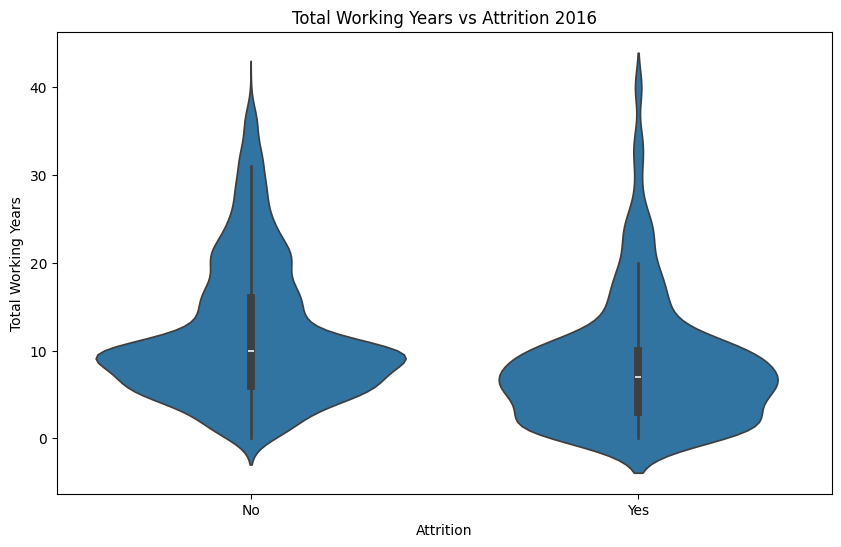

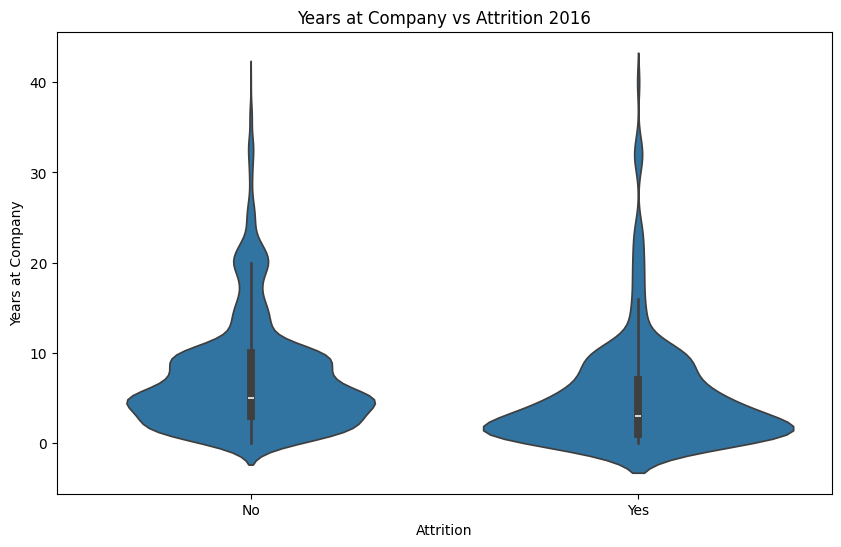

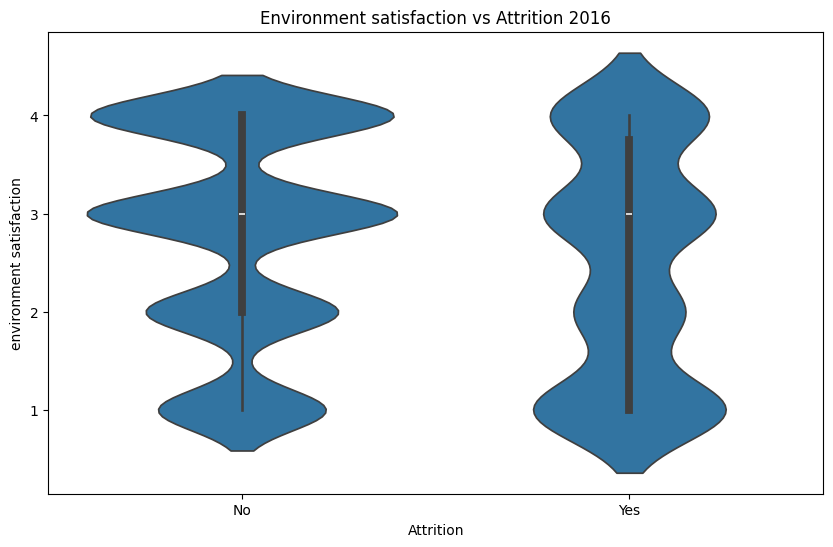

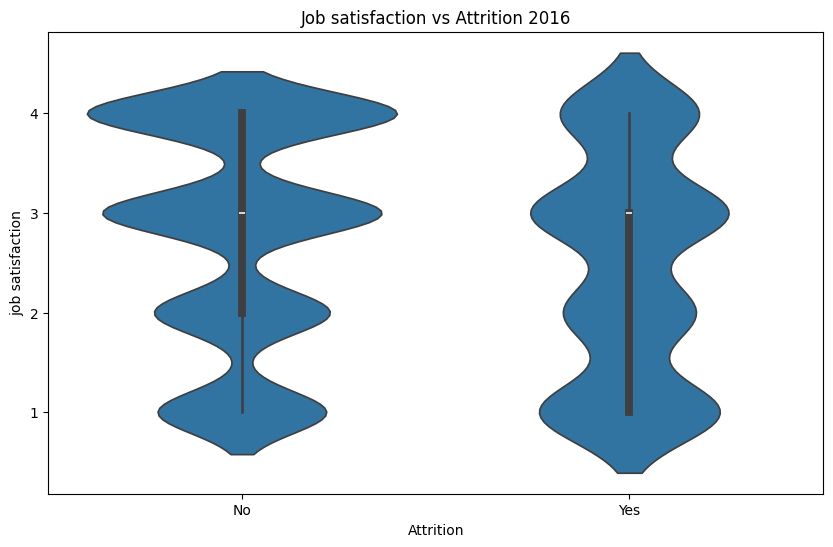

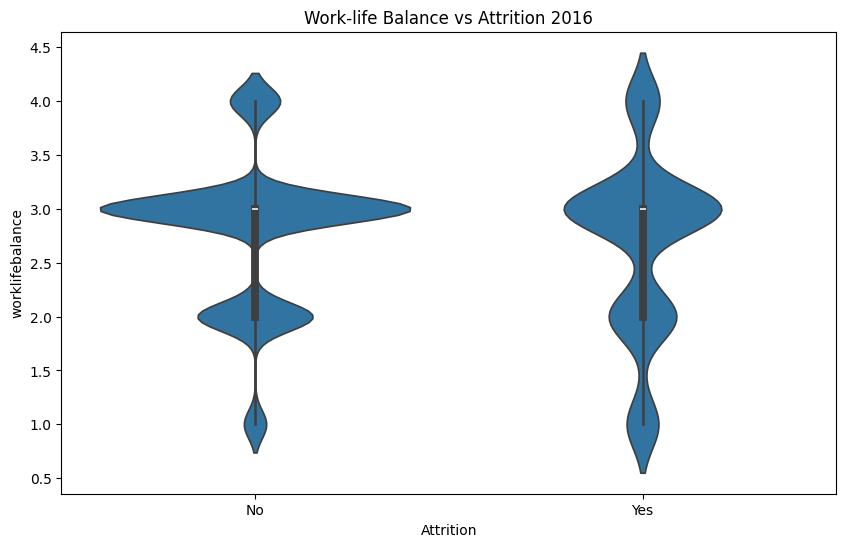

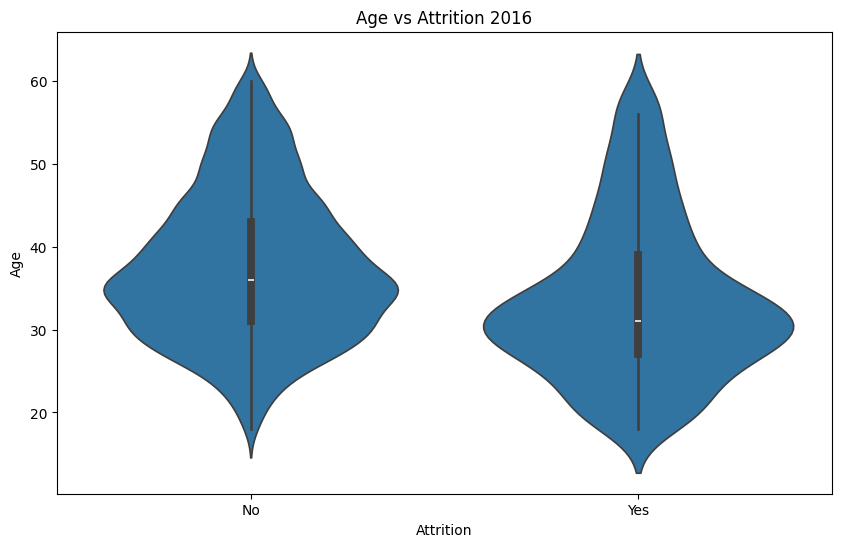

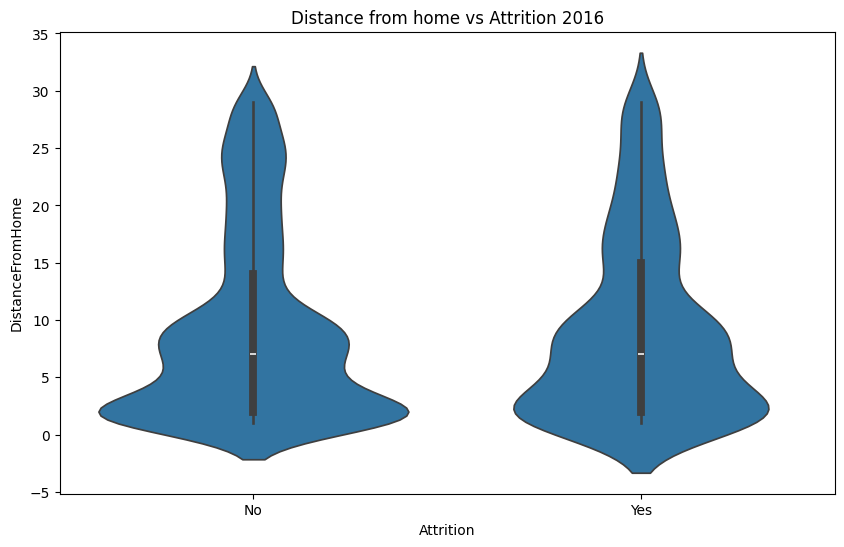

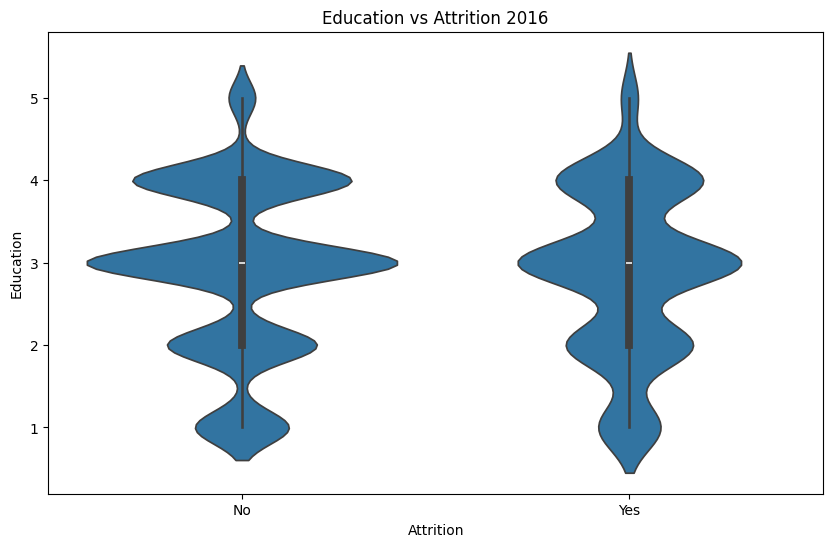

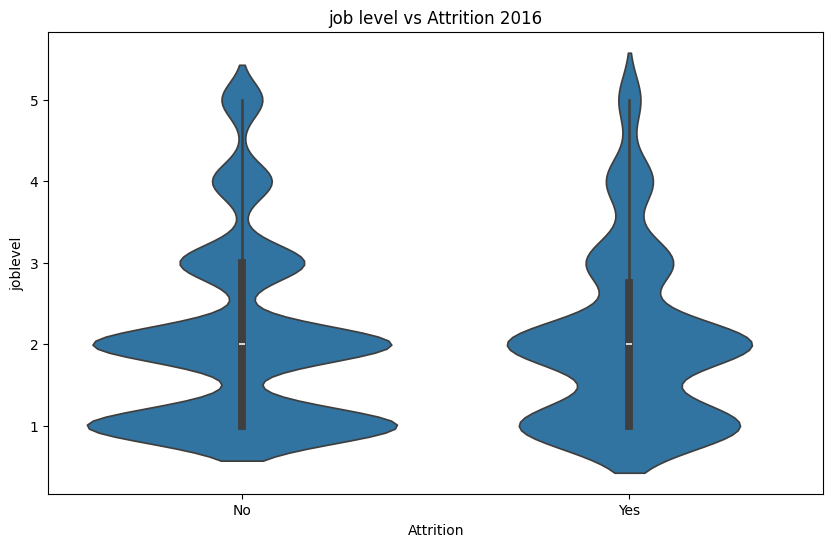

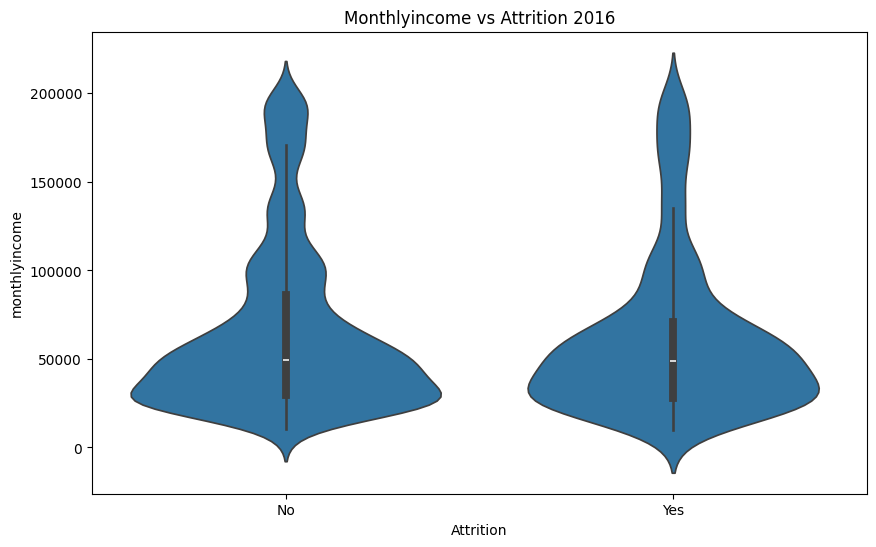

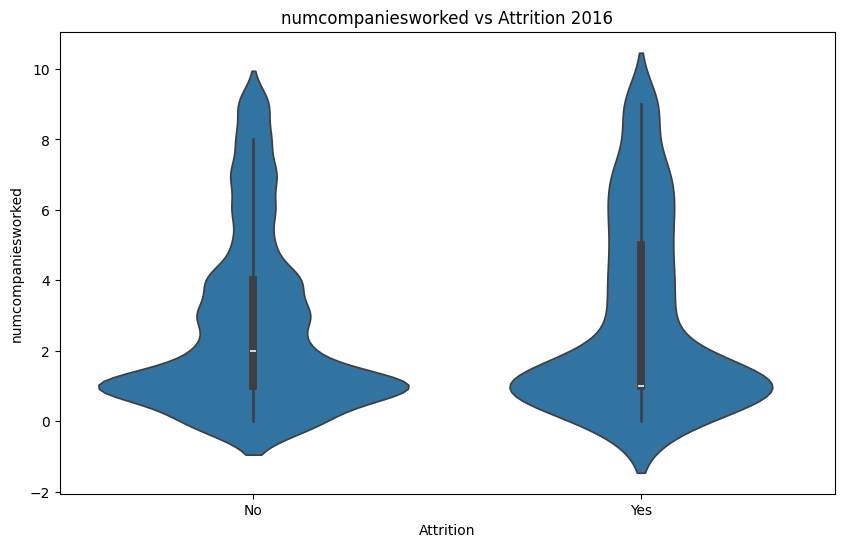

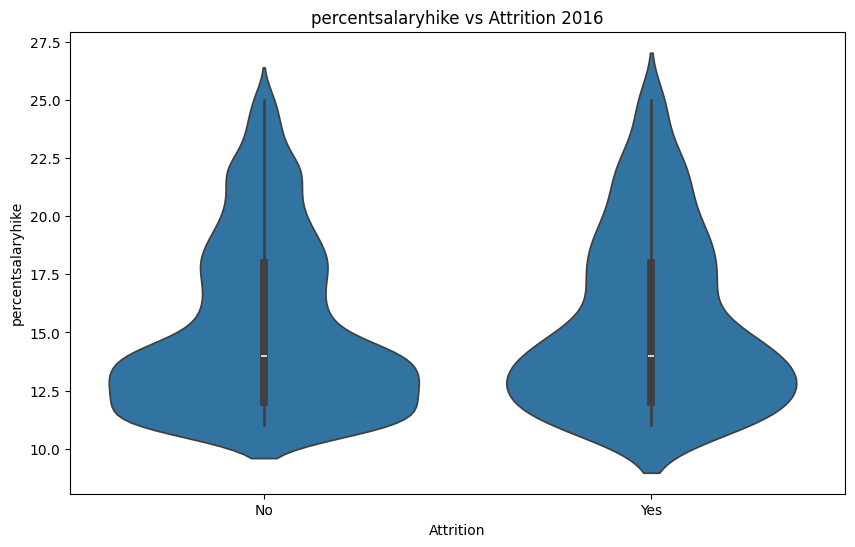

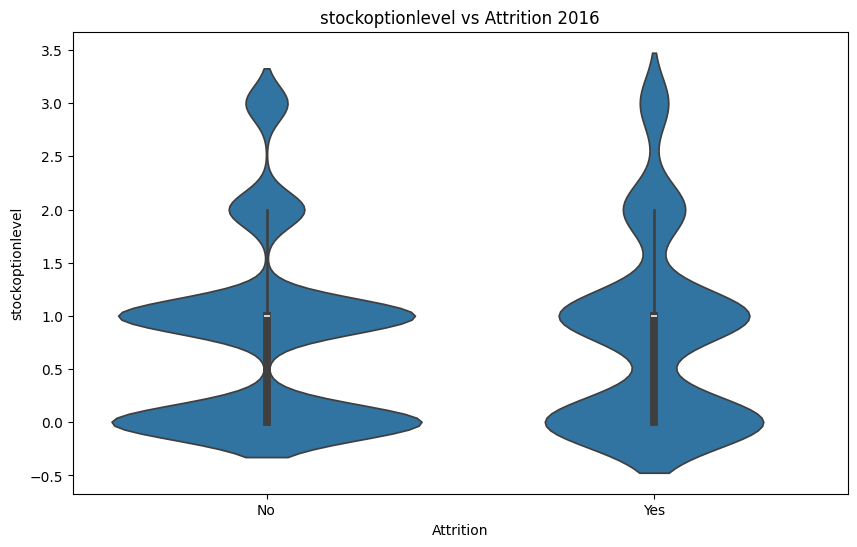

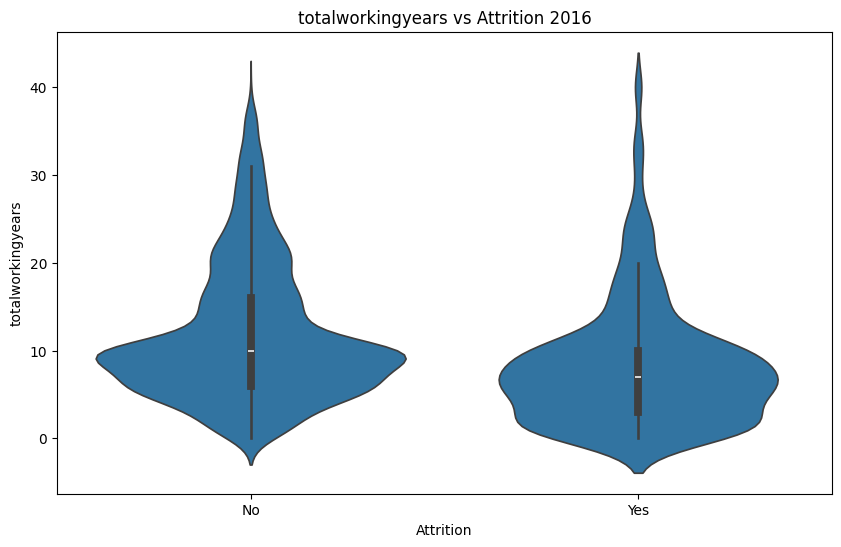

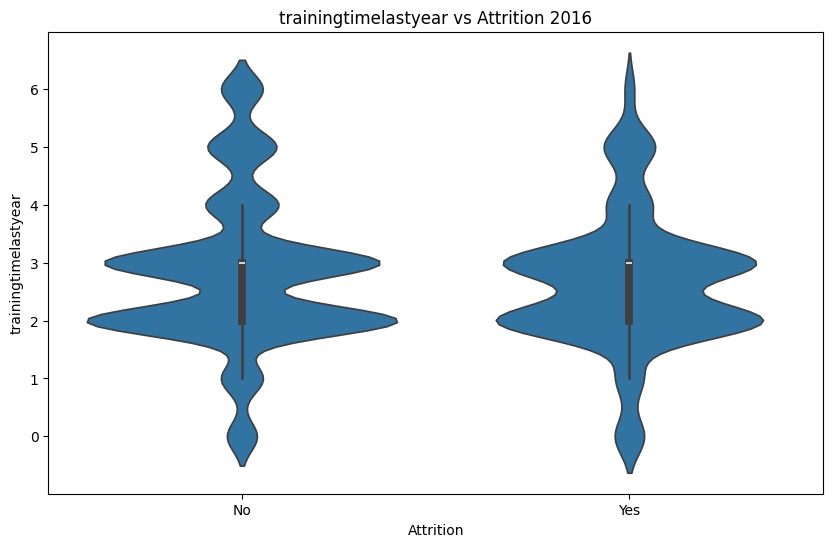

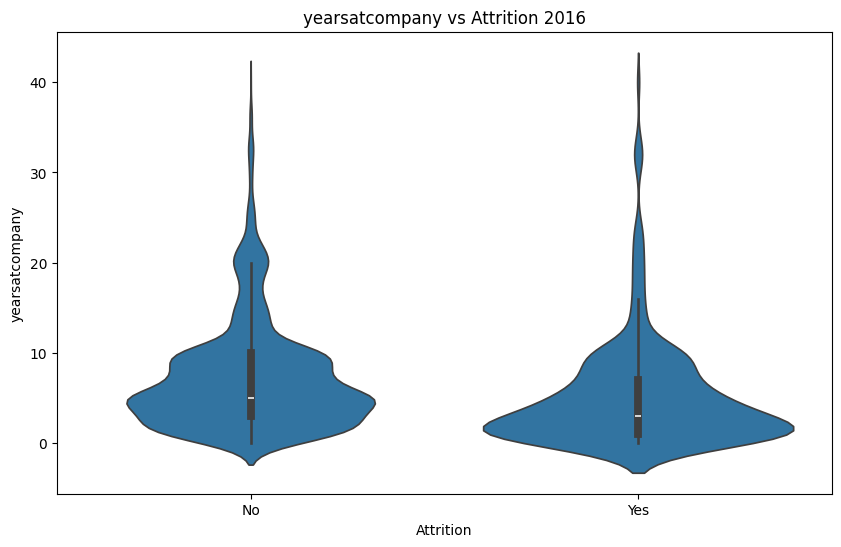

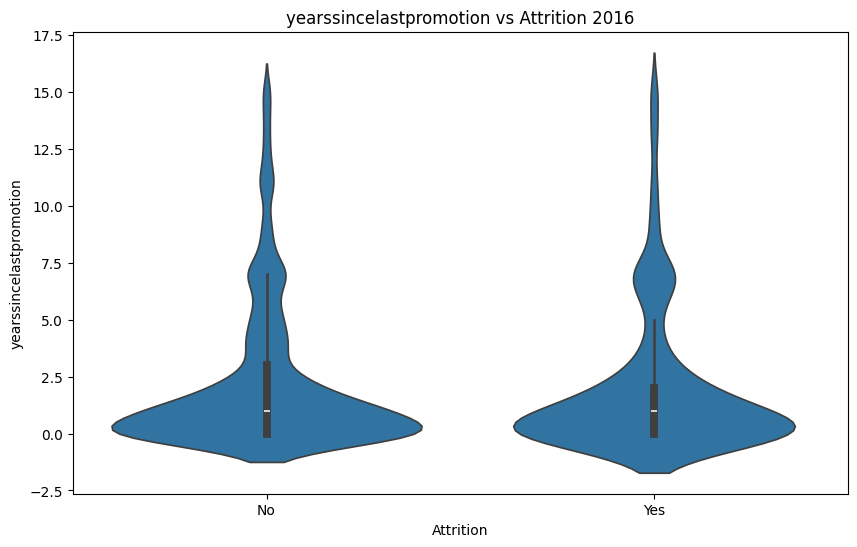

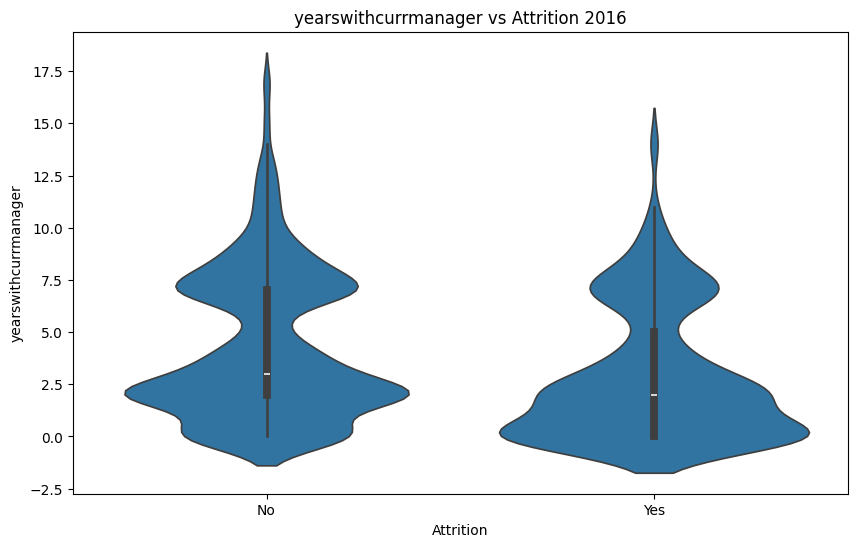

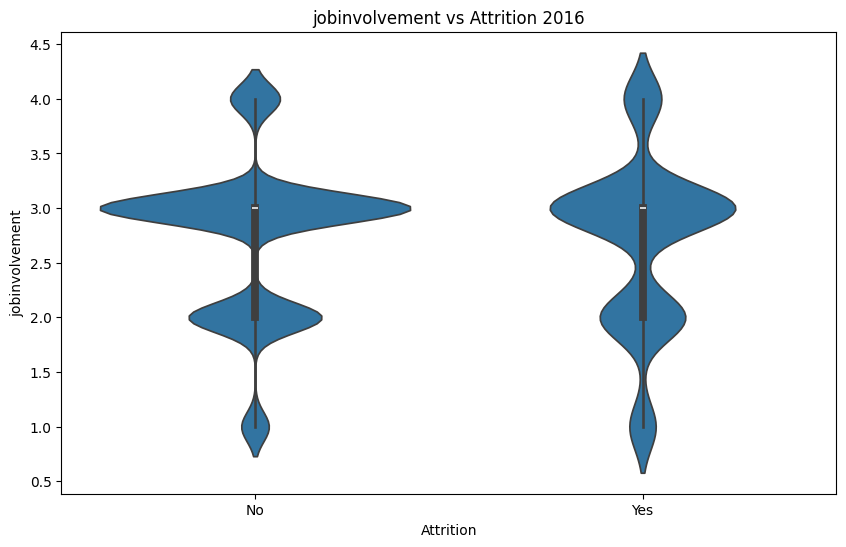

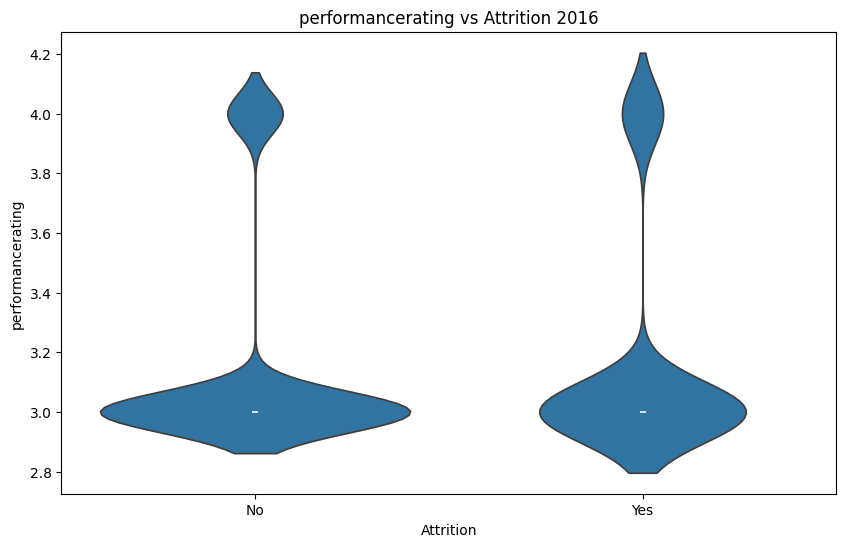

In [57]:
# Gráfico de diagrama de violín para 'totalworkingyears' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='totalworkingyears')
plt.title('Total Working Years vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

# Gráfico de diagrama de violín para 'yearsatcompany' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='yearsatcompany')
plt.title('Years at Company vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

# Gráfico de diagrama de violín para 'environmentsatisfaction' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='environmentsatisfaction')
plt.title('Environment satisfaction vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('environment satisfaction')
plt.show()

# Gráfico de diagrama de violín para 'jobsatisfaction' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='jobsatisfaction')
plt.title('Job satisfaction vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('job satisfaction')
plt.show()

# Gráfico de diagrama de violín para 'worklifebalance' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='worklifebalance')
plt.title('Work-life Balance vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('worklifebalance')
plt.show()

# Gráfico de diagrama de violín para 'age' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='age')
plt.title('Age vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# Gráfico de diagrama de violín para 'distancefromhome' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='distancefromhome')
plt.title('Distance from home vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

# Gráfico de diagrama de violín para 'education' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='education')
plt.title('Education vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.show()

# Gráfico de diagrama de violín para 'Joblevel' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='joblevel')
plt.title('job level vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('joblevel')
plt.show()

# Gráfico de diagrama de violín para 'monthlyincome' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='monthlyincome')
plt.title('Monthlyincome vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('monthlyincome')
plt.show()

# Gráfico de diagrama de violín para 'numcompaniesworked' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='numcompaniesworked')
plt.title('numcompaniesworked vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('numcompaniesworked')
plt.show()

# Gráfico de diagrama de violín para 'percentsalaryhike' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='percentsalaryhike')
plt.title('percentsalaryhike vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('percentsalaryhike')
plt.show()

# Gráfico de diagrama de violín para 'stockoptionlevel' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='stockoptionlevel')
plt.title('stockoptionlevel vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('stockoptionlevel')
plt.show()

# Gráfico de diagrama de violín para 'totalworkingyears' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='totalworkingyears')
plt.title('totalworkingyears vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('totalworkingyears')
plt.show()

# Gráfico de diagrama de violín para 'trainingtimeslastyear' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='trainingtimeslastyear')
plt.title('trainingtimelastyear vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('trainingtimelastyear')
plt.show()

# Gráfico de diagrama de violín para 'yearsatcompany' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='yearsatcompany')
plt.title('yearsatcompany vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('yearsatcompany')
plt.show()

# Gráfico de diagrama de violín para 'yearssincelastpromotion' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='yearssincelastpromotion')
plt.title('yearssincelastpromotion vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('yearssincelastpromotion')
plt.show()

# Gráfico de diagrama de violín para 'yearswithcurrmanager' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='yearswithcurrmanager')
plt.title('yearswithcurrmanager vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('yearswithcurrmanager')
plt.show()

# Gráfico de diagrama de violín para 'jobinvolvement' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='jobinvolvement')
plt.title('jobinvolvement vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('jobinvolvement')
plt.show()

# Gráfico de diagrama de violín para 'performancerting' con respecto a 'attrition' 2016
plt.figure(figsize=(10, 6))
sns.violinplot(data=r_2016, x='attrition', y='performancerating')
plt.title('performancerating vs Attrition 2016')
plt.xlabel('Attrition')
plt.ylabel('performancerating')
plt.show()

**Finalmente se procede a eliminar las columnas que tienen que ver con fechas debido a que ya cumplieron con su objetivo dentro del caso de estudio que era ayudar a juntar las bases de datos, identificar datos repetidos, inconsistencias y fechas de corte de las encuestas.**

In [58]:
#Se eliminan las columnas con fechas que ya no aportan al caso de estudio

r_2015 = r_2015.drop(['datesurvey', 'infodate', 'surveydate', 'retirementdate'], axis=1)
r_2016 = r_2016.drop(['datesurvey', 'infodate', 'surveydate', 'retirementdate' ], axis=1)
r_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   environmentsatisfaction  4410 non-null   float64
 1   jobsatisfaction          4410 non-null   float64
 2   worklifebalance          4410 non-null   float64
 3   age                      4410 non-null   int64  
 4   businesstravel           4410 non-null   object 
 5   department               4410 non-null   object 
 6   distancefromhome         4410 non-null   int64  
 7   education                4410 non-null   int64  
 8   educationfield           4410 non-null   object 
 9   gender                   4410 non-null   object 
 10  joblevel                 4410 non-null   int64  
 11  jobrole                  4410 non-null   object 
 12  maritalstatus            4410 non-null   object 
 13  monthlyincome            4410 non-null   int64  
 14  numcompaniesworked      

In [59]:
#Se guardan las BD para llamarlos en otros Scripts

r_2015.to_csv('r_2015_e.csv', index=True)
r_2016.to_csv('r_2016_e.csv', index=True)